# Unidad 1 ‚Äì Fases 1 a 3 (CRISP-DM)

### Proyecto: An√°lisis y predicci√≥n de la deserci√≥n de estudiantes en la Universidad Peruana Uni√≥n

-Business Understanding ‚Üí Data Understanding ‚Üí Data Preparation
-  **Integrantes:** Orihuela Orozco Luis, Ponce Galarza Brayan


## Fase 1. Business Understanding

### üéØ 1. Objective

Desarrollar un modelo predictivo para la deserci√≥n estudiantil en la Universidad Peruana Uni√≥n, utilizando datos generados artificialmente como base.

## Fase 2. Data Understanding

### üì• 2. Data collection 

In [11]:
import pandas as pd
import numpy as np

'''
df_p1 = pd.read_csv("in_data_cruda_p1_27072025.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como √≠ndice
'''
df = pd.read_excel("upeu_data_desercion.xlsx")


In [12]:
# Eliminar columnas que no aportan
df = df.drop(columns=['Nombres Completos'])
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   G√©nero                                                                                                                    5000 non-null   object 
 1   Modo de solicitud                                                                                                         5000 non-null   object 
 2   Orden de solicitud                                                                                                        5000 non-null   object 
 3   Facultad                                                                                                                  5000 non-n

G√©nero                     Modo de solicitud Orden de solicitud  \
0      M                       Ingreso directo     Segunda Opci√≥n   
1      H          Examen de admisi√≥n ordinario     Segunda Opci√≥n   
2      H          Examen de admisi√≥n ordinario     Primera Opci√≥n   
3      H                       Ingreso directo     Primera Opci√≥n   
4      H          Examen de admisi√≥n ordinario     Primera Opci√≥n   
5      M          Examen de admisi√≥n ordinario     Tercera Opci√≥n   
6      M          Examen de admisi√≥n ordinario     Segunda Opci√≥n   
7      H                 Ingreso por reingreso     Segunda Opci√≥n   
8      M                       Ingreso directo     Primera Opci√≥n   
9      M  Ingreso por convenio o beca especial     Tercera Opci√≥n   

                       Facultad Trasladado(a)  \
0                      Teolog√≠a            S√≠   
1          Ciencias de la Salud            No   
2  Ciencias Humanas y Educaci√≥n            No   
3        Ciencias Empresariales            No   
4  Ciencias Humanas y Educaci√≥n            No   
5        Ciencias Empresariales            No   
6        Ciencias Empresariales            No   
7          Ciencias de la Salud            No   
8          Ciencias de la Salud            No   
9        Ciencias Empresariales            No   

  Necesidades educativas especiales Procedencia        Vivienda  \
0                                No   Provincia      Residencia   
1                                No        Lima  Alquila cuarto   
2                                No        Lima      Familiares   
3                                No   Provincia      Familiares   
4                                No        Lima      Residencia   
5                                No        Lima      Familiares   
6                                No   Provincia      Residencia   
7                                S√≠        Lima      Familiares   
8                                No        Lima      Residencia   
9                                No        Lima      Residencia   

  Crianza Adventista Estado civil  ...  \
0                 No      Soltero  ...   
1                 S√≠      Soltero  ...   
2                 S√≠      Soltero  ...   
3                 S√≠      Soltero  ...   
4                 S√≠      Soltero  ...   
5                 S√≠      Soltero  ...   
6                 S√≠      Soltero  ...   
7                 S√≠      Soltero  ...   
8                 S√≠      Soltero  ...   
9                 S√≠      Soltero  ...   

  ¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?  \
0                                                  5                                                 
1                                                  5                                                 
2                                                  2                                                 
3                                                  4                                                 
4                                                  5                                                 
5                                                  3                                                 
6                                                  2                                                 
7                                                  1                                                 
8                                                  3                                                 
9                                                  3                                                 

  ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
0                                                  2                                                                 
1                                                  3                                                       

### üìä 3. Descriptive analysis

#### 3.1 An√°lisis descriptivo

In [13]:
#Resumen estad√≠stico de todas las variables (describe()).
df.describe(include="all").T # incluye categ√≥ricas y num√©ricas

count unique  \
G√©nero                                                5000      2   
Modo de solicitud                                     5000      6   
Orden de solicitud                                    5000      3   
Facultad                                              5000      5   
Trasladado(a)                                         5000      2   
Necesidades educativas especiales                     5000      2   
Procedencia                                           5000      3   
Vivienda                                              5000      3   
Crianza Adventista                                    5000      2   
Estado civil                                          5000      2   
Titulaci√≥n de la madre                                5000      5   
Titulaci√≥n del padre                                  5000      5   
Ocupaci√≥n de la madre                                 5000     10   
Ocupaci√≥n del padre                                   5000     10   
Formas de Pago                                        5000      3   
Descuento                                           5000.0    NaN   
Deuda                                               5000.0    NaN   
Matr√≠cula al d√≠a                                      5000      2   
Becario                                               5000      2   
Edad                                                5000.0    NaN   
Unidades curriculares 1.¬∫ semestre (matriculadas)   5000.0    NaN   
Unidades curriculares 1.¬∫ semestre (evaluadas)      5000.0    NaN   
Unidades curriculares 1.¬∫ semestre (aprobadas)      5000.0    NaN   
Desarrollo de Tareas (%)                            5000.0    NaN   
Asistencia (%)                                      5000.0    NaN   
Promedio ponderado del semestre                     5000.0    NaN   
Situaci√≥n laboral                                     5000      3   
Condici√≥n Final                                       5000      2   
¬øLa distancia y la separaci√≥n de mi familia par...  5000.0    NaN   
¬øLa incompatibilidad entre mis horarios de trab...  5000.0    NaN   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...  5000.0    NaN   
¬øLa falta de recursos econ√≥micos, becas o facil...  5000.0    NaN   
¬øMe siento poco integrado/a con mis compa√±eros ...  5000.0    NaN   
¬øEl estr√©s, la ansiedad u otros problemas de bi...  5000.0    NaN   
¬øLa falta de seguridad dentro o cerca del campu...  5000.0    NaN   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...  5000.0    NaN   
¬øLa carrera/facultad donde estoy matriculado no...  5000.0    NaN   
¬øLa dificultad de los cursos supera mis capacid...  5000.0    NaN   
¬øCuento con poco apoyo familiar para continuar ...  5000.0    NaN   
¬øMe cuesta adaptarme a la cultura y normas inst...  5000.0    NaN   
¬øNo veo una trayectoria profesional clara a par...  5000.0    NaN   

                                                                                top  \
G√©nero                                                                            M   
Modo de solicitud                                      Examen de admisi√≥n ordinario   
Orden de solicitud                                                   Primera Opci√≥n   
Facultad                                                     Ciencias Empresariales   
Trasladado(a)                                                                    No   
Necesidades educativas especiales                                                No   
Procedencia                                                                    Lima   
Vivienda                                                                 Familiares   
Crianza Adventista                                                               S√≠   
Estado civil                                                                Soltero   
Titulaci√≥n de la madre                                                   Secundaria   
Titulaci√≥n del padre                                                   

In [14]:
# Separar los datos seg√∫ sus Tipos de variables (num√©ricas, categ√≥ricas). fechas se considera como cat aunque tambi√©n puedes separr
numeric_data = df.select_dtypes(include=[np.number])
categor_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 22 numeric and 19 categorical columns in train data


In [15]:
numeric_data.describe().T
# Puedes ver la Distribuci√≥n de variables num√©ricas (cantidad o freq, media, mediana, desviaci√≥n est√°ndar, m√≠n, m√°x. etc.).

count        mean  \
Descuento                                           5000.0  498.158632   
Deuda                                               5000.0  960.131896   
Edad                                                5000.0   21.595400   
Unidades curriculares 1.¬∫ semestre (matriculadas)   5000.0    5.999200   
Unidades curriculares 1.¬∫ semestre (evaluadas)      5000.0    5.502000   
Unidades curriculares 1.¬∫ semestre (aprobadas)      5000.0    3.511800   
Desarrollo de Tareas (%)                            5000.0   79.186820   
Asistencia (%)                                      5000.0   84.553320   
Promedio ponderado del semestre                     5000.0   12.746932   
¬øLa distancia y la separaci√≥n de mi familia par...  5000.0    2.976800   
¬øLa incompatibilidad entre mis horarios de trab...  5000.0    2.999000   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...  5000.0    2.760400   
¬øLa falta de recursos econ√≥micos, becas o facil...  5000.0    3.556400   
¬øMe siento poco integrado/a con mis compa√±eros ...  5000.0    2.818000   
¬øEl estr√©s, la ansiedad u otros problemas de bi...  5000.0    2.930600   
¬øLa falta de seguridad dentro o cerca del campu...  5000.0    2.689200   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...  5000.0    2.695600   
¬øLa carrera/facultad donde estoy matriculado no...  5000.0    2.865000   
¬øLa dificultad de los cursos supera mis capacid...  5000.0    3.333400   
¬øCuento con poco apoyo familiar para continuar ...  5000.0    2.866200   
¬øMe cuesta adaptarme a la cultura y normas inst...  5000.0    2.858800   
¬øNo veo una trayectoria profesional clara a par...  5000.0    2.756600   

                                                           std    min  \
Descuento                                           346.624256   5.51   
Deuda                                               885.856249   0.87   
Edad                                                  3.072065  16.00   
Unidades curriculares 1.¬∫ semestre (matriculadas)     1.410389   4.00   
Unidades curriculares 1.¬∫ semestre (evaluadas)        1.513953   3.00   
Unidades curriculares 1.¬∫ semestre (aprobadas)        1.331546   1.00   
Desarrollo de Tareas (%)                             10.126950  38.30   
Asistencia (%)                                        8.251159  50.60   
Promedio ponderado del semestre                       2.990212   5.00   
¬øLa distancia y la separaci√≥n de mi familia par...    1.502902   1.00   
¬øLa incompatibilidad entre mis horarios de trab...    1.549929   1.00   
¬øLa calidad de la ense√±anza y las metodolog√≠as ...    1.535534   1.00   
¬øLa falta de recursos econ√≥micos, becas o facil...    1.450669   1.00   
¬øMe siento poco integrado/a con mis compa√±eros ...    1.518070   1.00   
¬øEl estr√©s, la ansiedad u otros problemas de bi...    1.532140   1.00   
¬øLa falta de seguridad dentro o cerca del campu...    1.508860   1.00   
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...    1.540200   1.00   
¬øLa carrera/facultad donde estoy matriculado no...    1.528673   1.00   
¬øLa dificultad de los cursos supera mis capacid...    1.531507   1.00   
¬øCuento con poco apoyo familiar para continuar ...    1.535959   1.00   
¬øMe cuesta adaptarme a la cultura y normas inst...    1.539525   1.00   
¬øNo veo una trayectoria profesional clara a par...    1.518755   1.00   

                                                         25%     50%  \
Descuento                                           244.1675  415.49   
Deuda                                               331.0125  712.79   
Edad                                                 19.0000   22.00   
Unidades curriculares 1.¬∫ semestre (matriculadas)     5.0000    6.00   
Unidades curriculares 1.¬∫ semestre (evaluadas)        4.0000    5.00   
Unidades curriculares 1.¬∫ semestre (aprobadas)        3.0000    3.00   
Desarrollo de Tareas (%)                             72.5000   79.30   
Asistencia (%)                             

In [16]:
categor_data.describe(include="all").T
# Puedes ver valores √∫nicos en categ√≥ricas (ej. State, Vehicle type, Fuel type), freq, etc.

count unique  \
G√©nero                             5000      2   
Modo de solicitud                  5000      6   
Orden de solicitud                 5000      3   
Facultad                           5000      5   
Trasladado(a)                      5000      2   
Necesidades educativas especiales  5000      2   
Procedencia                        5000      3   
Vivienda                           5000      3   
Crianza Adventista                 5000      2   
Estado civil                       5000      2   
Titulaci√≥n de la madre             5000      5   
Titulaci√≥n del padre               5000      5   
Ocupaci√≥n de la madre              5000     10   
Ocupaci√≥n del padre                5000     10   
Formas de Pago                     5000      3   
Matr√≠cula al d√≠a                   5000      2   
Becario                            5000      2   
Situaci√≥n laboral                  5000      3   
Condici√≥n Final                    5000      2   

                                                               top  freq  
G√©nero                                                           M  2750  
Modo de solicitud                     Examen de admisi√≥n ordinario  3008  
Orden de solicitud                                  Primera Opci√≥n  3458  
Facultad                                    Ciencias Empresariales  1479  
Trasladado(a)                                                   No  4494  
Necesidades educativas especiales                               No  4862  
Procedencia                                                   Lima  2729  
Vivienda                                                Familiares  2471  
Crianza Adventista                                              S√≠  3231  
Estado civil                                               Soltero  4752  
Titulaci√≥n de la madre                                  Secundaria  1914  
Titulaci√≥n del padre                                    Secundaria  1700  
Ocupaci√≥n de la madre              Ama de casa / labores del hogar   819  
Ocupaci√≥n del padre                      Comerciantes / vendedores  1043  
Formas de Pago                                             Armadas  2796  
Matr√≠cula al d√≠a                                                S√≠  4391  
Becario                                                         No  4339  
Situaci√≥n laboral                                       No Trabaja  2829  
Condici√≥n Final                                           Graduado  3679

In [17]:
# Columnas categ√≥ricas a explorar
categorical_cols = [
    'G√©nero','Modo de solicitud','Orden de solicitud','Facultad',
    'Trasladado(a)','Necesidades educativas especiales','Procedencia',
    'Vivienda','Crianza Adventista','Estado civil','Titulaci√≥n de la madre',
    'Titulaci√≥n del padre','Ocupaci√≥n de la madre','Ocupaci√≥n del padre',
    'Formas de Pago','Matr√≠cula al d√≠a','Becario','Situaci√≥n laboral','Condici√≥n Final'
]

# Conteo de valores √∫nicos en categ√≥ricas
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo
print("\nCondici√≥n Final:\n", df["Condici√≥n Final"].value_counts())


G√©nero:
 G√©nero
M    2750
H    2250
Name: count, dtype: int64

Modo de solicitud:
 Modo de solicitud
Examen de admisi√≥n ordinario            3008
Ingreso directo                         1001
Ingreso por convenio o beca especial     356
Ingreso por traslado externo             230
Ingreso por traslado interno             210
Ingreso por reingreso                    195
Name: count, dtype: int64

Orden de solicitud:
 Orden de solicitud
Primera Opci√≥n    3458
Segunda Opci√≥n    1171
Tercera Opci√≥n     371
Name: count, dtype: int64

Facultad:
 Facultad
Ciencias Empresariales          1479
Ingenier√≠a y Arquitectura       1384
Ciencias de la Salud            1017
Ciencias Humanas y Educaci√≥n     931
Teolog√≠a                         189
Name: count, dtype: int64

Trasladado(a):
 Trasladado(a)
No    4494
S√≠     506
Name: count, dtype: int64

Necesidades educativas especiales:
 Necesidades educativas especiales
No    4862
S√≠     138
Name: count, dtype: int64

Procedencia:
 Procedenci

#### 3.2 An√°lisis descriptivo (gr√°ficos)

In [18]:
import numpy as np
import pandas as pd

# 1) Derivadas clave
df["tasa_aprobacion"]  = (df["Unidades curriculares 1.¬∫ semestre (aprobadas)"] 
                          / df["Unidades curriculares 1.¬∫ semestre (evaluadas)"]).replace([np.inf, -np.inf], np.nan)
df["tasa_evaluacion"]  = (df["Unidades curriculares 1.¬∫ semestre (evaluadas)"] 
                          / df["Unidades curriculares 1.¬∫ semestre (matriculadas)"])
df["carga_aprobada"]   = (df["Unidades curriculares 1.¬∫ semestre (aprobadas)"] 
                          / df["Unidades curriculares 1.¬∫ semestre (matriculadas)"])
df["deuda_neta"]       = df["Deuda"] - df["Descuento"]
df["morosidad"]        = (df["Matr√≠cula al d√≠a"] == "No").astype(int)

likert_cols = [c for c in df.columns if c.strip().startswith("¬ø")]
df["likert_riesgo_prom"] = df[likert_cols].mean(axis=1)

map_orden = {"Primera Opci√≥n":0,"Segunda Opci√≥n":1,"Tercera Opci√≥n":2}
df["orden_prioridad"] = df["Orden de solicitud"].map(map_orden)

map_lab = {"No Trabaja":0,"Medio Tiempo":1,"Tiempo completo":2}
df["trabajo_ordinal"] = df["Situaci√≥n laboral"].map(map_lab)

df["backlog_eval"] = df["Unidades curriculares 1.¬∫ semestre (matriculadas)"] - df["Unidades curriculares 1.¬∫ semestre (evaluadas)"]
df["backlog_aprob"] = df["Unidades curriculares 1.¬∫ semestre (evaluadas)"] - df["Unidades curriculares 1.¬∫ semestre (aprobadas)"]

# Bandas √∫tiles
df["asistencia_banda"] = pd.cut(df["Asistencia (%)"], bins=[0,75,85,95,100], labels=["<75","75-85","85-95","95-100"])
df["deuda_banda"] = pd.cut(df["deuda_neta"], bins=[-np.inf,0,500,1500,3000,np.inf], 
                           labels=["<=0","0-500","500-1500","1500-3000",">3000"])


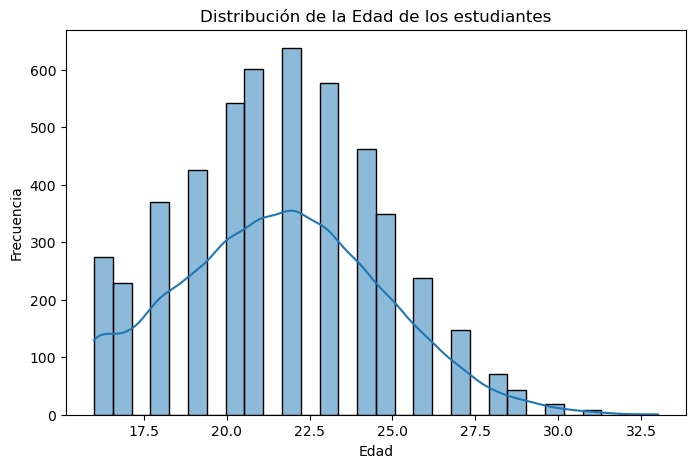

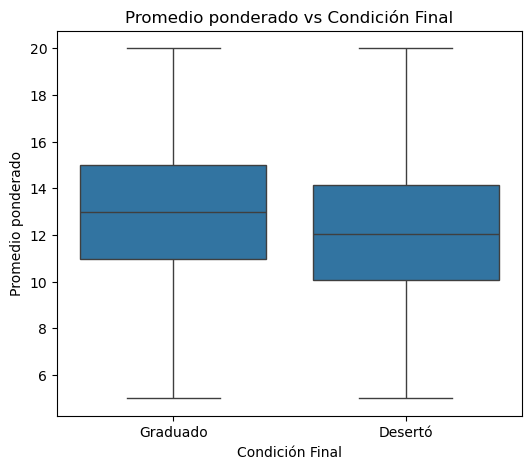

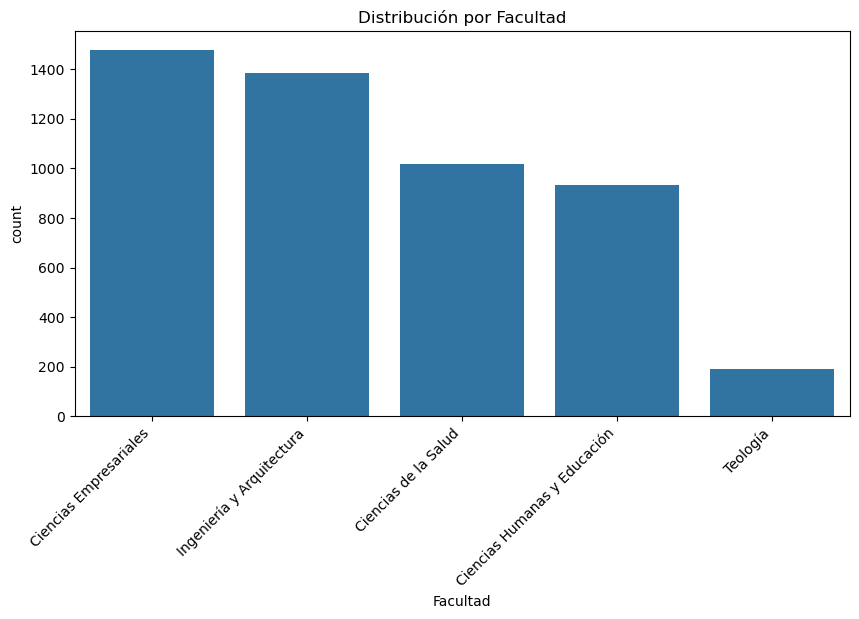

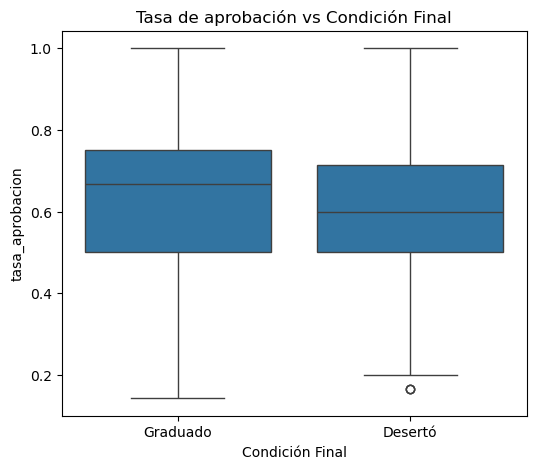

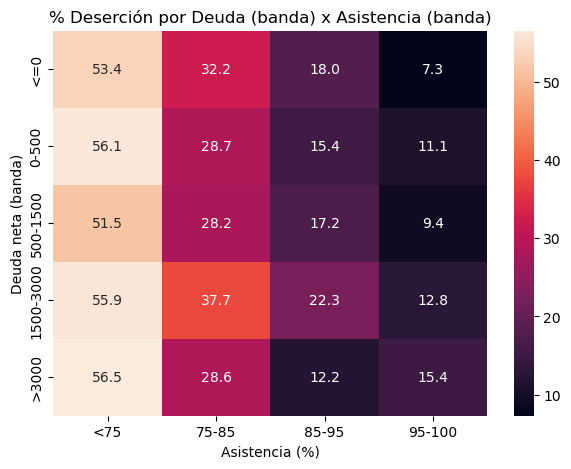

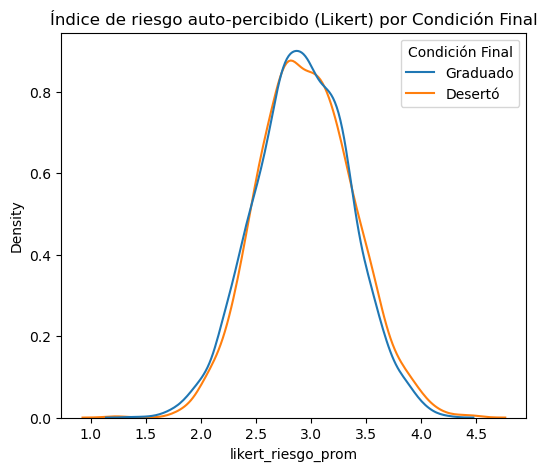

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Edad de los estudiantes
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'], bins=30, kde=True)
plt.title("Distribuci√≥n de la Edad de los estudiantes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de promedio ponderado por Condici√≥n Final
plt.figure(figsize=(6,5))
sns.boxplot(x='Condici√≥n Final', y='Promedio ponderado del semestre', data=df)
plt.title("Promedio ponderado vs Condici√≥n Final")
plt.xlabel("Condici√≥n Final")
plt.ylabel("Promedio ponderado")
plt.show()

# Conteo de facultad
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Facultad', order=df['Facultad'].value_counts().index)
plt.title("Distribuci√≥n por Facultad")
plt.xticks(rotation=45, ha="right")
plt.show()

# Boxplot: tasa_aprobacion vs Condici√≥n Final
plt.figure(figsize=(6,5))
sns.boxplot(x="Condici√≥n Final", y="tasa_aprobacion", data=df)
plt.title("Tasa de aprobaci√≥n vs Condici√≥n Final")
plt.show()

# Heatmap: deserci√≥n por bandas de deuda y asistencia
tabla = pd.crosstab(df["deuda_banda"], df["asistencia_banda"], 
                    values=(df["Condici√≥n Final"]=="Desert√≥").astype(int), aggfunc="mean")
plt.figure(figsize=(7,5))
sns.heatmap(tabla*100, annot=True, fmt=".1f")
plt.title("% Deserci√≥n por Deuda (banda) x Asistencia (banda)")
plt.xlabel("Asistencia (%)"); plt.ylabel("Deuda neta (banda)")
plt.show()

# Relaci√≥n Likert compuesto vs Condici√≥n Final
plt.figure(figsize=(6,5))
sns.kdeplot(data=df, x="likert_riesgo_prom", hue="Condici√≥n Final", common_norm=False)
plt.title("√çndice de riesgo auto-percibido (Likert) por Condici√≥n Final")
plt.show()


#### 3.3 An√°lisis exploratorio (con estad√≠sticas): Correlaciones y cruces de variables

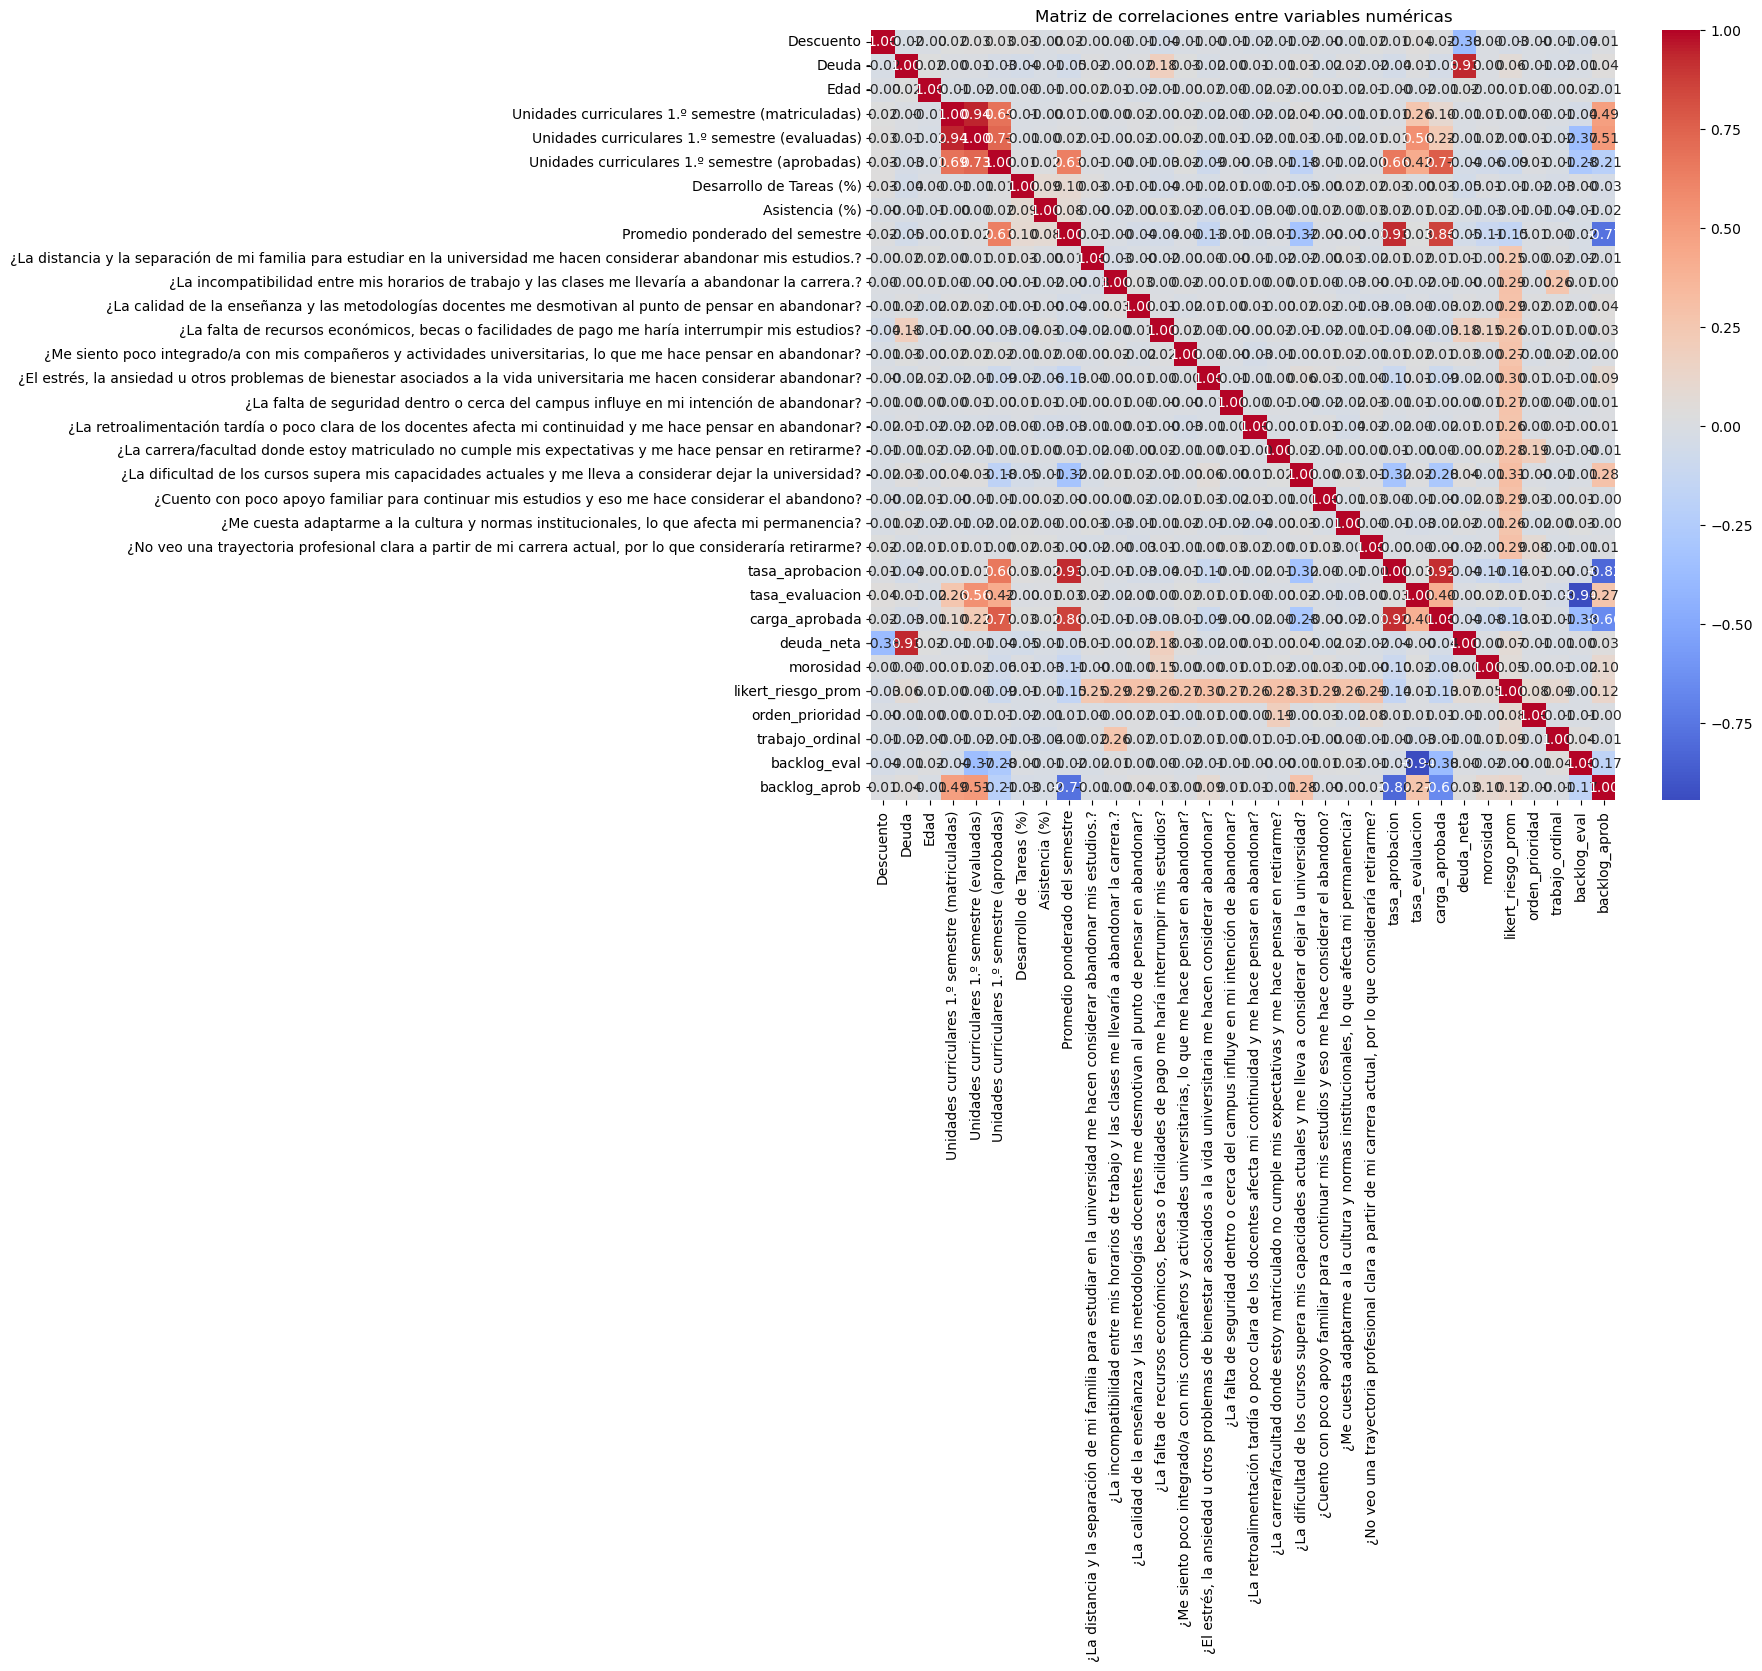


Distribuci√≥n porcentual de Condici√≥n Final por G√©nero:

Condici√≥n Final    Desert√≥   Graduado
G√©nero                               
H                26.800000  73.200000
M                26.109091  73.890909

Distribuci√≥n porcentual de Condici√≥n Final por Situaci√≥n laboral:

Condici√≥n Final      Desert√≥   Graduado
Situaci√≥n laboral                      
Medio Tiempo       28.248175  71.751825
No Trabaja         24.390244  75.609756
Tiempo completo    30.461923  69.538077

Distribuci√≥n porcentual de Condici√≥n Final por Carrera:

Condici√≥n Final                 Desert√≥   Graduado
Facultad                                          
Ciencias Empresariales        29.141312  70.858688
Ciencias Humanas y Educaci√≥n  28.141783  71.858217
Ciencias de la Salud          13.569322  86.430678
Ingenier√≠a y Arquitectura     32.658960  67.341040
Teolog√≠a                      20.105820  79.894180

% Deserci√≥n ‚Äî Situaci√≥n laboral √ó Asistencia:
 asistencia_banda    <75  75-85  85-9

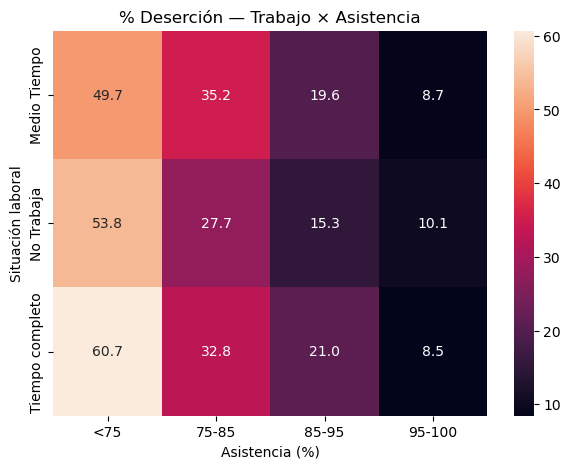


% Deserci√≥n ‚Äî Matr√≠cula al d√≠a √ó Deuda (bandas):
 deuda_banda        <=0  0-500  500-1500  1500-3000  >3000
Matr√≠cula al d√≠a                                         
No                43.3   38.3      34.8       35.5   54.5
S√≠                24.8   23.1      23.9       31.0   24.1


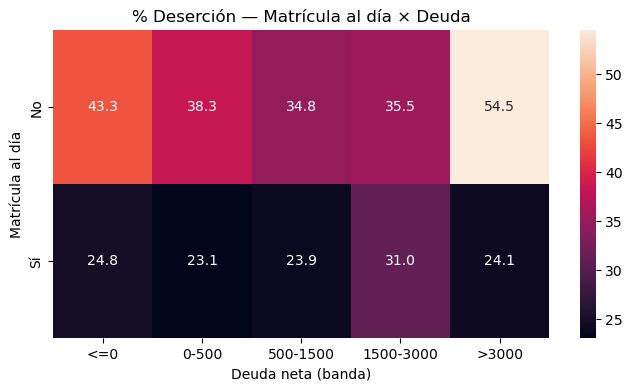


% Deserci√≥n ‚Äî Becario √ó Deuda (bandas):
 deuda_banda   <=0  0-500  500-1500  1500-3000  >3000
Becario                                             
No           28.9   25.2      25.9       33.1   27.4
S√≠           19.9   22.4      16.9       17.8   23.1


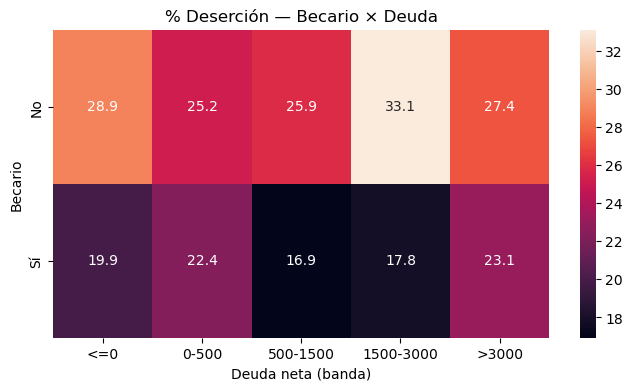


% Deserci√≥n ‚Äî Asistencia (bandas) √ó Tareas (bandas):
 tareas_banda       <60  60-75  75-85  85-95  95-100
asistencia_banda                                   
<75               77.4   63.7   55.2   34.6    22.2
75-85             63.8   40.3   28.5   20.9     8.4
85-95             47.3   27.4   15.3    7.9     6.6
95-100            26.3   15.8    8.1    4.4     4.3


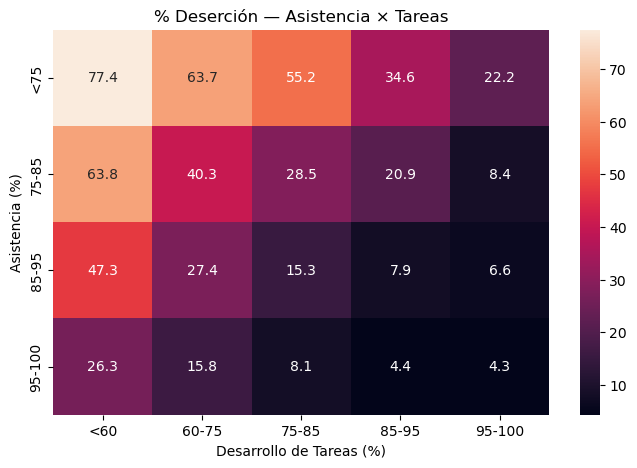


% Deserci√≥n ‚Äî Orden de solicitud √ó Facultad:
 Facultad            Ciencias Empresariales  Ciencias Humanas y Educaci√≥n  \
Orden de solicitud                                                         
Primera Opci√≥n                        28.3                          29.6   
Segunda Opci√≥n                        31.8                          25.6   
Tercera Opci√≥n                        28.1                          21.7   

Facultad            Ciencias de la Salud  Ingenier√≠a y Arquitectura  Teolog√≠a  
Orden de solicitud                                                             
Primera Opci√≥n                      13.0                       31.9      19.9  
Segunda Opci√≥n                      14.5                       33.9      25.0  
Tercera Opci√≥n                      16.4                       35.8      11.8  


In [21]:
# 1. Correlaciones num√©ricas (rendimiento acad√©mico, edad, asistencia, etc.)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones entre variables num√©ricas")
plt.show()

if "asistencia_banda" not in df.columns:
    df["asistencia_banda"] = pd.cut(df["Asistencia (%)"],
                                    bins=[0,75,85,95,100],
                                    labels=["<75","75-85","85-95","95-100"])
if "deuda_neta" not in df.columns:
    df["deuda_neta"] = df["Deuda"] - df["Descuento"]
if "deuda_banda" not in df.columns:
    df["deuda_banda"] = pd.cut(df["deuda_neta"],
                               bins=[-np.inf,0,500,1500,3000,np.inf],
                               labels=["<=0","0-500","500-1500","1500-3000",">3000"])
if "tasa_aprobacion" not in df.columns:
    df["tasa_aprobacion"] = (df["Unidades curriculares 1.¬∫ semestre (aprobadas)"] /
                             df["Unidades curriculares 1.¬∫ semestre (evaluadas)"]).replace([np.inf,-np.inf], np.nan)
if "tareas_banda" not in df.columns:
    df["tareas_banda"] = pd.cut(df["Desarrollo de Tareas (%)"],
                                bins=[0,60,75,85,95,100],
                                labels=["<60","60-75","75-85","85-95","95-100"])

target_bin = (df["Condici√≥n Final"]=="Desert√≥").astype(int)


# 2. Cruce de variables categ√≥ricas con la variable objetivo (Condici√≥n Final)
# Ejemplo: G√©nero vs Condici√≥n Final
cruce_genero = pd.crosstab(df['G√©nero'], df['Condici√≥n Final'], normalize='index') * 100
print("\nDistribuci√≥n porcentual de Condici√≥n Final por G√©nero:\n")
print(cruce_genero)

# Otro ejemplo: Situaci√≥n laboral vs Condici√≥n Final
cruce_trabajo = pd.crosstab(df['Situaci√≥n laboral'], df['Condici√≥n Final'], normalize='index') * 100
print("\nDistribuci√≥n porcentual de Condici√≥n Final por Situaci√≥n laboral:\n")
print(cruce_trabajo)

# Otro ejemplo: Carrera vs Condici√≥n Final (puede ser m√°s grande)
cruce_carrera = pd.crosstab(df['Facultad'], df['Condici√≥n Final'], normalize='index') * 100
print("\nDistribuci√≥n porcentual de Condici√≥n Final por Carrera:\n")
print(cruce_carrera.head())  # solo mostramos las primeras filas para no saturar

# Situaci√≥n laboral √ó Asistencia (bandas) ===
tab1 = pd.crosstab(df["Situaci√≥n laboral"], df["asistencia_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserci√≥n ‚Äî Situaci√≥n laboral √ó Asistencia:\n", (tab1*100).round(1))

plt.figure(figsize=(7,5))
sns.heatmap(tab1*100, annot=True, fmt=".1f")
plt.title("% Deserci√≥n ‚Äî Trabajo √ó Asistencia"); plt.xlabel("Asistencia (%)"); plt.ylabel("Situaci√≥n laboral")
plt.show()

#  Matr√≠cula al d√≠a √ó Deuda (bandas) ===
tab2 = pd.crosstab(df["Matr√≠cula al d√≠a"], df["deuda_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserci√≥n ‚Äî Matr√≠cula al d√≠a √ó Deuda (bandas):\n", (tab2*100).round(1))

plt.figure(figsize=(8,4))
sns.heatmap(tab2*100, annot=True, fmt=".1f")
plt.title("% Deserci√≥n ‚Äî Matr√≠cula al d√≠a √ó Deuda"); plt.xlabel("Deuda neta (banda)"); plt.ylabel("Matr√≠cula al d√≠a")
plt.show()

# Becario √ó Deuda (bandas) ===
tab3 = pd.crosstab(df["Becario"], df["deuda_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserci√≥n ‚Äî Becario √ó Deuda (bandas):\n", (tab3*100).round(1))

plt.figure(figsize=(8,4))
sns.heatmap(tab3*100, annot=True, fmt=".1f")
plt.title("% Deserci√≥n ‚Äî Becario √ó Deuda"); plt.xlabel("Deuda neta (banda)"); plt.ylabel("Becario")
plt.show()

# Asistencia (bandas) √ó Desarrollo de Tareas (bandas) ===
tab4 = pd.crosstab(df["asistencia_banda"], df["tareas_banda"], values=target_bin, aggfunc="mean")
print("\n% Deserci√≥n ‚Äî Asistencia (bandas) √ó Tareas (bandas):\n", (tab4*100).round(1))

plt.figure(figsize=(8,5))
sns.heatmap(tab4*100, annot=True, fmt=".1f")
plt.title("% Deserci√≥n ‚Äî Asistencia √ó Tareas"); plt.xlabel("Desarrollo de Tareas (%)"); plt.ylabel("Asistencia (%)")
plt.show()

# === (Opcional muy √∫til) Orden de solicitud √ó Facultad ===
tab5 = pd.crosstab(df["Orden de solicitud"], df["Facultad"], values=target_bin, aggfunc="mean")
print("\n% Deserci√≥n ‚Äî Orden de solicitud √ó Facultad:\n", (tab5*100).round(1))


#### 3.4 Diagn√≥stico de calidad inicial 


Valores faltantes por columna:

G√©nero                                                                                                                      0
Modo de solicitud                                                                                                           0
Orden de solicitud                                                                                                          0
Facultad                                                                                                                    0
Trasladado(a)                                                                                                               0
Necesidades educativas especiales                                                                                           0
Procedencia                                                                                                                 0
Vivienda                                                                            

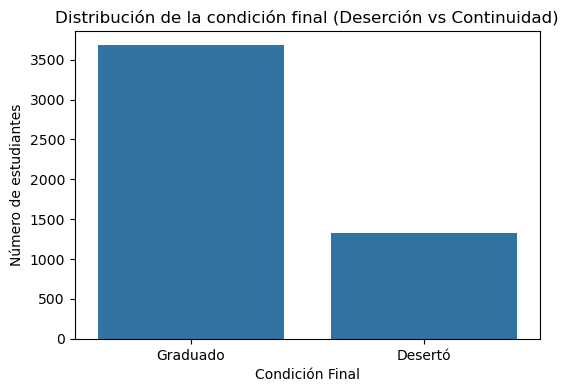


Duplicados exactos de filas: 0

Valores fuera de dominio por columna (si hay):

Resultados de reglas de consistencia:
- asistencia_0_100: True
- tareas_0_100: True
- promedio_5_20: True
- uc_eval_le_mat: True
- uc_aprob_le_eval: True
- descuento_deuda_no_neg: True

Casos con evaluadas==0 y aprobadas>0: 0

√çtems Likert con valores fuera de 1‚Äì5 (si hay): OK

Outliers (conteo; rango IQR aceptable):
- Deuda: 245 outliers; rango‚âà(-1109.75, 2732.29)
- Descuento: 156 outliers; rango‚âà(-396.5, 1311.95)
- Edad: 2 outliers; rango‚âà(11.5, 31.5)
- Asistencia (%): 22 outliers; rango‚âà(61.75, 107.75)
- Desarrollo de Tareas (%): 16 outliers; rango‚âà(52.06, 106.56)
- Promedio ponderado del semestre: 0 outliers; rango‚âà(4.58, 20.94)

% Deserci√≥n por Facultad:
Facultad
Ingenier√≠a y Arquitectura       32.7
Ciencias Empresariales          29.1
Ciencias Humanas y Educaci√≥n    28.1
Teolog√≠a                        20.1
Ciencias de la Salud            13.6
Name: drop, dtype: float64


In [22]:
# --- 1. Valores faltantes ---
print("\nValores faltantes por columna:\n")
print(df.isnull().sum())

# --- 2. Posibles inconsistencias ---
# Edad
print("\nEdad m√≠nima y m√°xima:")
print("M√≠nimo:", df['Edad'].min())
print("M√°ximo:", df['Edad'].max())

# Promedio ponderado
print("\nPromedio ponderado m√≠nimo y m√°ximo:")
print("M√≠nimo:", df['Promedio ponderado del semestre'].min())
print("M√°ximo:", df['Promedio ponderado del semestre'].max())

# Nota: aqu√≠ puedes revisar si hay edades imposibles (ej. 5 a√±os o 90 a√±os) o promedios fuera de rango (ej. >20 en escala peruana).

# --- 3. Distribuci√≥n de la variable objetivo ---
plt.figure(figsize=(6,4))
sns.countplot(x='Condici√≥n Final', data=df, order=df['Condici√≥n Final'].value_counts().index)
plt.title("Distribuci√≥n de la condici√≥n final (Deserci√≥n vs Continuidad)")
plt.xlabel("Condici√≥n Final")
plt.ylabel("N√∫mero de estudiantes")
plt.show()

# --- 4. Duplicados exactos ---
dup_count = df.duplicated().sum()
print(f"\nDuplicados exactos de filas: {dup_count}")

# --- 5. Validaci√≥n de dominios categ√≥ricos (valores inesperados) ---
expected = {
    "G√©nero": {"H","M"},
    "Modo de solicitud": {"Examen de admisi√≥n ordinario","Ingreso por traslado externo","Ingreso por traslado interno",
                          "Ingreso por convenio o beca especial","Ingreso directo","Ingreso por reingreso"},
    "Orden de solicitud": {"Primera Opci√≥n","Segunda Opci√≥n","Tercera Opci√≥n"},
    "Facultad": {"Ciencias Empresariales","Ciencias Humanas y Educaci√≥n","Ingenier√≠a y Arquitectura","Ciencias de la Salud","Teolog√≠a"},
    "Trasladado(a)": {"S√≠","No"},
    "Necesidades educativas especiales": {"S√≠","No"},
    "Procedencia": {"Lima","Provincia","Extranjero"},
    "Vivienda": {"Residencia","Familiares","Alquila cuarto"},
    "Crianza Adventista": {"S√≠","No"},
    "Estado civil": {"Soltero","Casado"},
    "Formas de Pago": {"Armadas","Contado","Otros"},
    "Matr√≠cula al d√≠a": {"S√≠","No"},
    "Becario": {"S√≠","No"},
    "Situaci√≥n laboral": {"No Trabaja","Medio Tiempo","Tiempo completo"},
}
print("\nValores fuera de dominio por columna (si hay):")
for col, dom in expected.items():
    if col in df.columns:
        ood = set(df[col].dropna().unique()) - dom
        if ood:
            print(f"- {col}: {ood}")

# --- 6. Reglas de consistencia entre columnas ---
import numpy as np
rules = {
    "asistencia_0_100": df["Asistencia (%)"].between(0,100).all(),
    "tareas_0_100": df["Desarrollo de Tareas (%)"].between(0,100).all(),
    "promedio_5_20": df["Promedio ponderado del semestre"].between(0,20).all(),  # ajusta si usas otra escala
    "uc_eval_le_mat": (df["Unidades curriculares 1.¬∫ semestre (evaluadas)"] 
                       <= df["Unidades curriculares 1.¬∫ semestre (matriculadas)"]).all(),
    "uc_aprob_le_eval": (df["Unidades curriculares 1.¬∫ semestre (aprobadas)"] 
                         <= df["Unidades curriculares 1.¬∫ semestre (evaluadas)"]).all(),
    "descuento_deuda_no_neg": (df["Descuento"].ge(0).all() and df["Deuda"].ge(0).all()),
}
print("\nResultados de reglas de consistencia:")
for k,v in rules.items():
    print(f"- {k}: {v}")

# Casos puntuales sospechosos
mask_eval_0_aprob_pos = (df["Unidades curriculares 1.¬∫ semestre (evaluadas)"]==0) & (df["Unidades curriculares 1.¬∫ semestre (aprobadas)"]>0)
print("\nCasos con evaluadas==0 y aprobadas>0:", int(mask_eval_0_aprob_pos.sum()))

# --- 7. Integridad de √≠tems Likert (1‚Äì5) ---
likert_cols = [c for c in df.columns if c.strip().startswith("¬ø")]
viol = {}
for c in likert_cols:
    bad = ~df[c].isin([1,2,3,4,5])
    if bad.any():
        viol[c] = int(bad.sum())
print("\n√çtems Likert con valores fuera de 1‚Äì5 (si hay):", viol if viol else "OK")

# --- 8. Outliers simples (IQR) en m√©tricas clave ---
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int((s < lo).sum() + (s > hi).sum()), (lo, hi)

num_check = ["Deuda","Descuento","Edad","Asistencia (%)","Desarrollo de Tareas (%)","Promedio ponderado del semestre"]
print("\nOutliers (conteo; rango IQR aceptable):")
for c in num_check:
    n_out, rng = iqr_outliers(df[c].astype(float))
    print(f"- {c}: {n_out} outliers; rango‚âà{tuple(round(x,2) for x in rng)}")

# --- 9. Balance de clase por Facultad (√∫til para segmentar) ---
dist_fac = (df.assign(drop=(df["Condici√≥n Final"]=="Desert√≥").astype(int))
              .groupby("Facultad")["drop"].mean().sort_values(ascending=False))
print("\n% Deserci√≥n por Facultad:")
print((dist_fac*100).round(1))



In [24]:
# --- 1. Valores faltantes ---
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(df)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

# --- 2. Duplicados ---
# Usamos Facultad + A√±o/Semestre (si lo tienes en tu data)
# Si no tienes fecha, dejamos solo ID
if 'ID' in df.columns:
    dup_keys = df.duplicated(subset=['Facultad'], keep=False)
    print('Registros potencialmente duplicados:', dup_keys.sum())
else:
    dup_keys = df.duplicated()
    print('Registros potencialmente duplicados:', dup_keys.sum())

# --- 3. Registros sospechosos ---
# Definimos reglas simples para detectar datos poco realistas
suspects = df[
    (df['Edad'] < 15) | (df['Edad'] > 70) |   # Edades sospechosas
    (df['Promedio ponderado del semestre'] < 0) | 
    (df['Promedio ponderado del semestre'] > 20)  # Notas fuera del rango
]

print("Registros sospechosos detectados:", len(suspects))
if len(suspects) > 0:
    display(suspects[['Edad','Facultad','Promedio ponderado del semestre','Condici√≥n Final']].head())


missing  missing_%
G√©nero                                                    0        0.0
¬øNo veo una trayectoria profesional clara a par...        0        0.0
¬øLa incompatibilidad entre mis horarios de trab...        0        0.0
¬øLa calidad de la ense√±anza y las metodolog√≠as ...        0        0.0
¬øLa falta de recursos econ√≥micos, becas o facil...        0        0.0
¬øMe siento poco integrado/a con mis compa√±eros ...        0        0.0
¬øEl estr√©s, la ansiedad u otros problemas de bi...        0        0.0
¬øLa falta de seguridad dentro o cerca del campu...        0        0.0
¬øLa retroalimentaci√≥n tard√≠a o poco clara de lo...        0        0.0
¬øLa carrera/facultad donde estoy matriculado no...        0        0.0
¬øLa dificultad de los cursos supera mis capacid...        0        0.0
¬øCuento con poco apoyo familiar para continuar ...        0        0.0
¬øMe cuesta adaptarme a la cultura y normas inst...        0        0.0
tasa_aprobacion                                           0        0.0
Modo de solicitud                                         0        0.0
tasa_evaluacion                                           0        0.0
carga_aprobada                                            0        0.0
deuda_neta                                                0        0.0
morosidad                                                 0        0.0
likert_riesgo_prom                                        0        0.0
orden_prioridad                                           0        0.0
trabajo_ordinal                                           0        0.0
backlog_eval                                              0        0.0
backlog_aprob                                             0        0.0
asistencia_banda                                          0        0.0
deuda_banda                                               0        0.0
¬øLa distancia y la separaci√≥n de mi familia par...        0        0.0
Condici√≥n Final                                           0        0.0
Situaci√≥n laboral                                         0        0.0
Promedio ponderado del semestre                           0        0.0
Orden de solicitud                                        0        0.0
Facultad                                                  0        0.0
Trasladado(a)                                             0        0.0
Necesidades educativas especiales                         0        0.0
Procedencia                                               0        0.0
Vivienda                                                  0        0.0
Crianza Adventista                                        0        0.0
Estado civil                                              0        0.0
Titulaci√≥n de la madre                                    0        0.0
Titulaci√≥n del padre                                      0        0.0
Ocupaci√≥n de la madre                                     0        0.0
Ocupaci√≥n del padre                                       0        0.0
Formas de Pago                                            0        0.0
Descuento                                                 0        0.0
Deuda                                                     0        0.0
Matr√≠cula al d√≠a                                          0        0.0
Becario                                                   0        0.0
Edad                                                      0        0.0
Unidades curriculares 1.¬∫ semestre (matriculadas)         0        0.0
Unidades curriculares 1.¬∫ semestre (evaluadas)            0        0.0
Unidades curriculares 1.¬∫ semestre (aprobadas)            0        0.0
Desarrollo de Tareas (%)                                  0        0.0
Asistencia (%)                                            0        0.0
tareas_banda                                              0        0.0

Registros potencialmente duplicados: 0
Registros sospechosos detectados: 0


#### 3.5 Perfil estad√≠stico comparativo (Aprobados vs Desaprobados)

In [25]:
# Medias comparativas de variables num√©ricas seg√∫n la Condici√≥n Final
medias_comparativas = df.groupby('Condici√≥n Final').mean(numeric_only=True)
display(medias_comparativas)

Descuento       Deuda       Edad  \
Condici√≥n Final                                      
Desert√≥          498.808456  996.032392  21.596518   
Graduado         497.925303  947.241286  21.594999   

                 Unidades curriculares 1.¬∫ semestre (matriculadas)  \
Condici√≥n Final                                                      
Desert√≥                                                   5.983346   
Graduado                                                  6.004893   

                 Unidades curriculares 1.¬∫ semestre (evaluadas)  \
Condici√≥n Final                                                   
Desert√≥                                                5.476911   
Graduado                                               5.511008   

                 Unidades curriculares 1.¬∫ semestre (aprobadas)  \
Condici√≥n Final                                                   
Desert√≥                                                3.330053   
Graduado                                               3.577059   

                 Desarrollo de Tareas (%)  Asistencia (%)  \
Condici√≥n Final                                             
Desert√≥                         74.906737       80.290386   
Graduado                        80.723648       86.083990   

                 Promedio ponderado del semestre  \
Condici√≥n Final                                    
Desert√≥                                12.094663   
Graduado                               12.981139   

                 ¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?  \
Condici√≥n Final                                                                                                                             
Desert√≥                                                   2.983346                                                                          
Graduado                                                  2.974450                                                                          

                 ...  tasa_aprobacion  tasa_evaluacion  carga_aprobada  \
Condici√≥n Final  ...                                                     
Desert√≥          ...         0.608342         0.910718        0.554349   
Graduado         ...         0.648224         0.911511        0.591296   

                 deuda_neta  morosidad  likert_riesgo_prom  orden_prioridad  \
Condici√≥n Final                                                               
Desert√≥          497.223936   0.180924            2.957317         0.391370   
Graduado         449.315983   0.100571            2.921864         0.379451   

                 trabajo_ordinal  backlog_eval  backlog_aprob  
Condici√≥n Final                                                
Desert√≥                 0.662377      0.506435       2.146858  
Graduado                0.569992      0.493884       1.933949  

[2 rows x 32 columns]

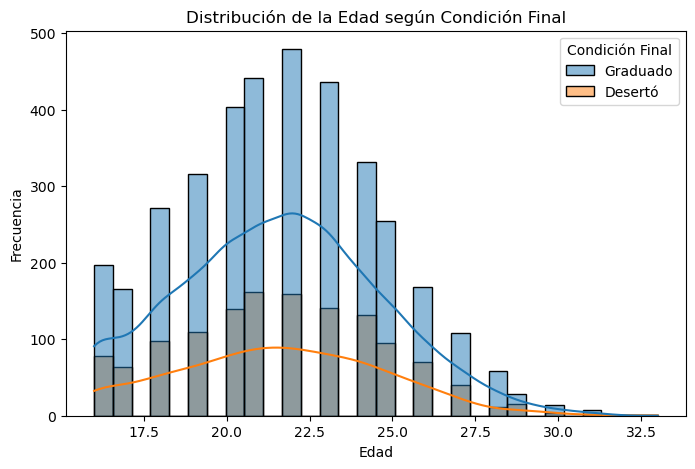

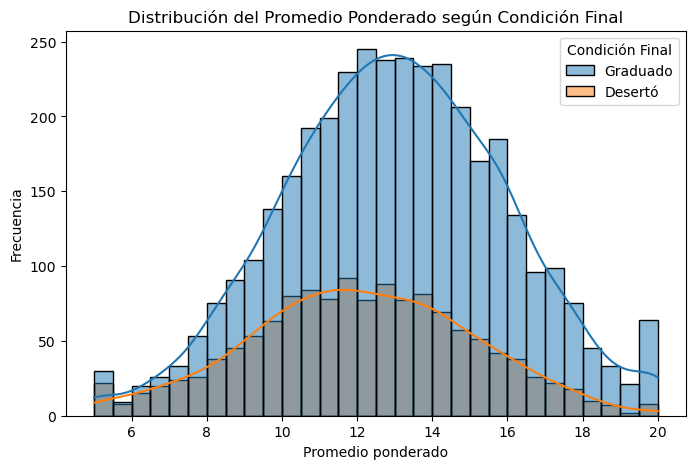

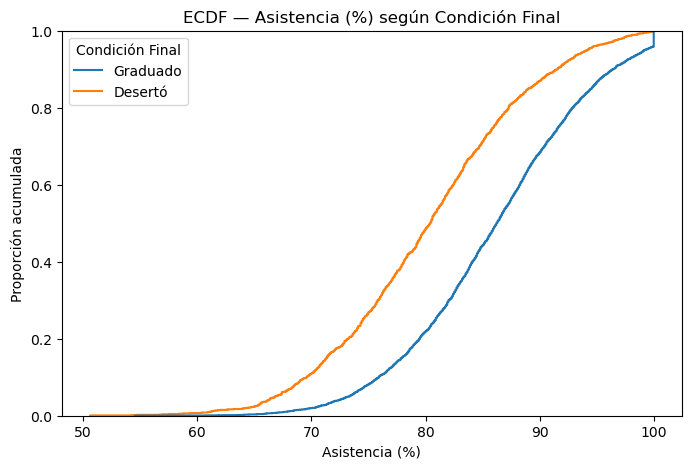

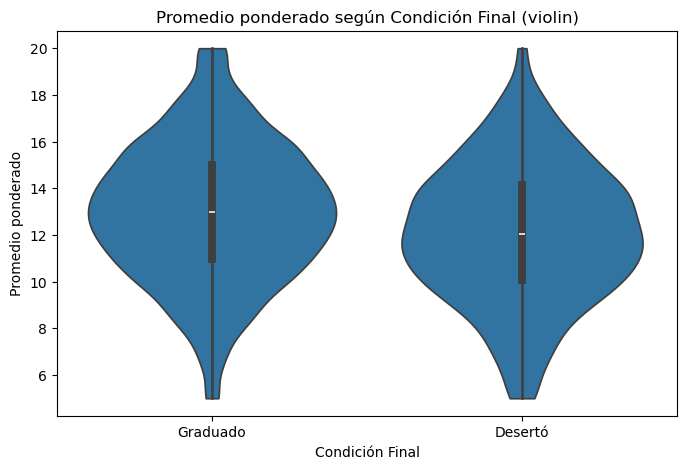

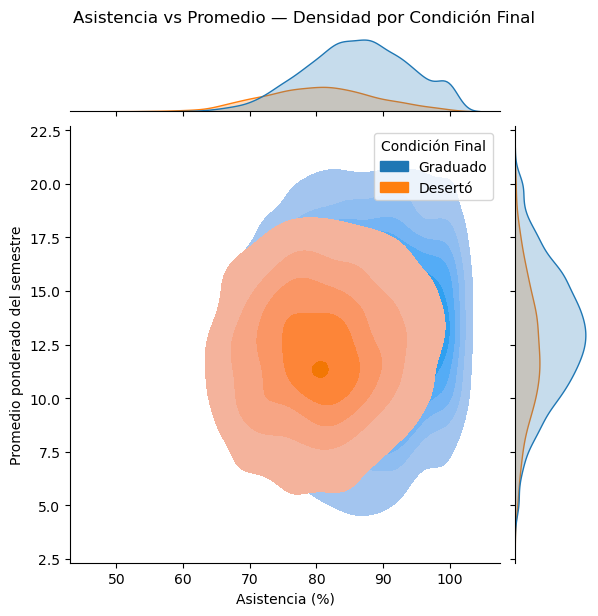

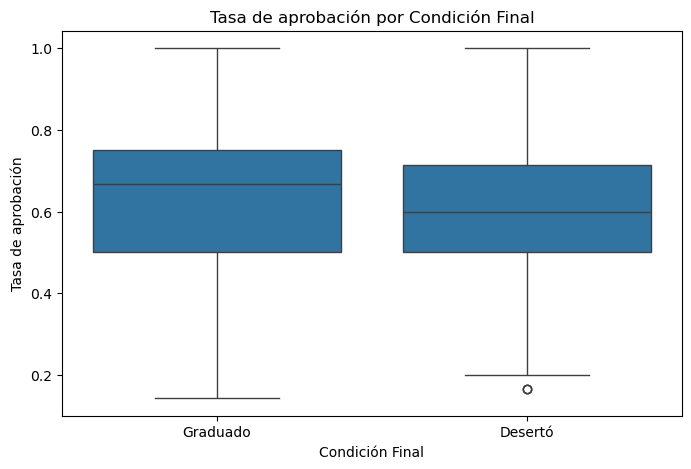

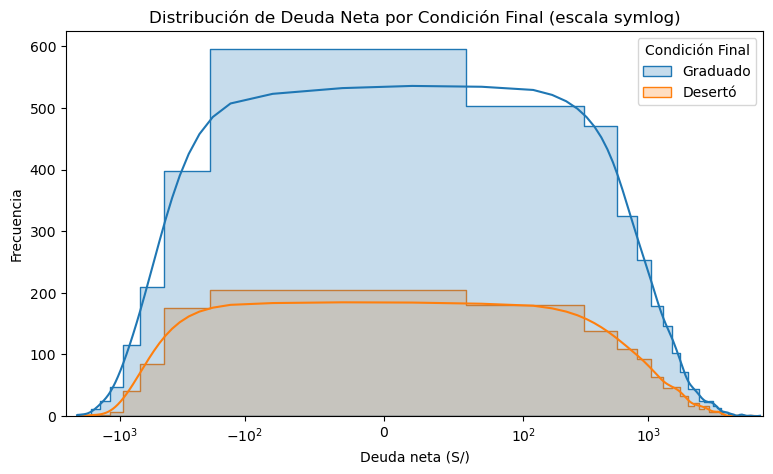

In [32]:
# 1. Distribuci√≥n de la Edad seg√∫n Condici√≥n Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Edad', hue='Condici√≥n Final', kde=True, bins=30)
plt.title("Distribuci√≥n de la Edad seg√∫n Condici√≥n Final")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 2. Distribuci√≥n del Promedio ponderado seg√∫n Condici√≥n Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Promedio ponderado del semestre', hue='Condici√≥n Final', kde=True, bins=30)
plt.title("Distribuci√≥n del Promedio Ponderado seg√∫n Condici√≥n Final")
plt.xlabel("Promedio ponderado")
plt.ylabel("Frecuencia")
plt.show()

# 3) ECDF de Asistencia por Condici√≥n Final (compatible con Jupyter/Seaborn)
# Asegura tipo num√©rico por si viene como texto
df["Asistencia (%)"] = pd.to_numeric(df["Asistencia (%)"], errors="coerce")

plt.figure(figsize=(8,5))
sns.ecdfplot(data=df, x="Asistencia (%)", hue="Condici√≥n Final", stat="proportion")
plt.title("ECDF ‚Äî Asistencia (%) seg√∫n Condici√≥n Final")
plt.xlabel("Asistencia (%)")
plt.ylabel("Proporci√≥n acumulada")
plt.show()

# 4) Violin del Promedio por Condici√≥n Final (distribuci√≥n + mediana)
# Asegura num√©rico
df["Promedio ponderado del semestre"] = pd.to_numeric(df["Promedio ponderado del semestre"], errors="coerce")

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="Condici√≥n Final",
    y="Promedio ponderado del semestre",
    inner="box", cut=0
)
plt.title("Promedio ponderado seg√∫n Condici√≥n Final (violin)")
plt.xlabel("Condici√≥n Final")
plt.ylabel("Promedio ponderado")
plt.show()

# 5) Asistencia vs Promedio ‚Äî Densidad por Condici√≥n Final
# (A) Intento con jointplot (si tu seaborn lo soporta con hue)
xcol, ycol = "Asistencia (%)", "Promedio ponderado del semestre"
df[xcol] = pd.to_numeric(df[xcol], errors="coerce")
df[ycol] = pd.to_numeric(df[ycol], errors="coerce")

try:
    g = sns.jointplot(
        data=df, x=xcol, y=ycol,
        hue="Condici√≥n Final", kind="kde",
        fill=True, height=6, thresh=0.05
    )
    g.fig.suptitle("Asistencia vs Promedio ‚Äî Densidad por Condici√≥n Final", y=1.02)
    plt.show()
except Exception as e:
    # (B) Fallback robusto con subplots y kdeplot
    fig, ax = plt.subplots(figsize=(7,5))
    for label, sub in df.dropna(subset=[xcol,ycol,"Condici√≥n Final"]).groupby("Condici√≥n Final"):
        sns.kdeplot(
            data=sub, x=xcol, y=ycol,
            fill=True, thresh=0.05, alpha=0.5, ax=ax, label=label
        )
    ax.set_title("Asistencia vs Promedio ‚Äî Densidad por Condici√≥n Final")
    ax.legend()
    plt.show()

# 6) Tasa de aprobaci√≥n por Condici√≥n Final (con limpieza y recorte 0-1)
if "tasa_aprobacion" not in df.columns:
    num_ap = pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (aprobadas)"], errors="coerce")
    num_ev = pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (evaluadas)"], errors="coerce")
    tasa = (num_ap / num_ev).replace([np.inf, -np.inf], np.nan)
    df["tasa_aprobacion"] = tasa.clip(0, 1)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Condici√≥n Final", y="tasa_aprobacion")
plt.title("Tasa de aprobaci√≥n por Condici√≥n Final")
plt.xlabel("Condici√≥n Final")
plt.ylabel("Tasa de aprobaci√≥n")
plt.show()

# 7) Presi√≥n financiera: Deuda neta por Condici√≥n Final (escala symlog segura)
if "deuda_neta" not in df.columns:
    df["Deuda"] = pd.to_numeric(df["Deuda"], errors="coerce")
    df["Descuento"] = pd.to_numeric(df["Descuento"], errors="coerce")
    df["deuda_neta"] = df["Deuda"] - df["Descuento"]

plt.figure(figsize=(9,5))
sns.histplot(
    data=df, x="deuda_neta", hue="Condici√≥n Final",
    kde=True, bins=40, element="step", common_norm=False
)
# symlog permite ver bien colas y valores cercanos a 0 (admite negativos y positivos)
plt.xscale("symlog", linthresh=100)
plt.title("Distribuci√≥n de Deuda Neta por Condici√≥n Final (escala symlog)")
plt.xlabel("Deuda neta (S/)")
plt.ylabel("Frecuencia")
plt.show()


In [36]:
# Perfil num√©rico: estad√≠sticas por Condici√≥n Final
# --- Derivadas m√≠nimas que ya ten√≠as ---
if "tasa_aprobacion" not in df.columns:
    df["tasa_aprobacion"] = (
        pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (aprobadas)"], errors="coerce") /
        pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (evaluadas)"], errors="coerce")
    ).replace([np.inf,-np.inf], np.nan).clip(0,1)

if "deuda_neta" not in df.columns:
    df["deuda_neta"] = pd.to_numeric(df["Deuda"], errors="coerce") - pd.to_numeric(df["Descuento"], errors="coerce")

# --- Derivadas adicionales recomendadas ---
ap = pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (aprobadas)"], errors="coerce")
ev = pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (evaluadas)"], errors="coerce")
ma = pd.to_numeric(df["Unidades curriculares 1.¬∫ semestre (matriculadas)"], errors="coerce")

df["tasa_evaluacion"] = (ev/ma).replace([np.inf,-np.inf], np.nan).clip(0,1)
df["carga_aprobada"]  = (ap/ma).replace([np.inf,-np.inf], np.nan).clip(0,1)
df["backlog_eval"]    = (ma - ev).clip(lower=0)     # matriculadas no evaluadas
df["backlog_aprob"]   = (ev - ap).clip(lower=0)     # evaluadas no aprobadas

# presi√≥n financiera compuesta (z-score simple); morosidad como 0/1
des = pd.to_numeric(df["Descuento"], errors="coerce")
deu = pd.to_numeric(df["Deuda"], errors="coerce")
dn  = pd.to_numeric(df["deuda_neta"], errors="coerce")

def z(s):
    m, sd = s.mean(), s.std(ddof=0)
    return (s - m)/sd if sd not in [0, np.nan] else s*0

df["riesgo_financiero"] = z(dn) - z(des)
df["morosidad_num"]     = (df["Matr√≠cula al d√≠a"] == "No").astype(int)

# desempe√±o continuo
asis = pd.to_numeric(df["Asistencia (%)"], errors="coerce")
tars = pd.to_numeric(df["Desarrollo de Tareas (%)"], errors="coerce")
prom = pd.to_numeric(df["Promedio ponderado del semestre"], errors="coerce")
df["z_asistencia"]      = z(asis)
df["z_tareas"]          = z(tars)
df["z_promedio"]        = z(prom)
df["indice_desempeno"]  = df[["z_asistencia","z_tareas","z_promedio"]].mean(axis=1)

# Likert: total y sub√≠ndices (ajusta si cambias tus preguntas)
likert_cols = [c for c in df.columns if c.strip().startswith("¬ø")]
if likert_cols:
    df["likert_total_mean"] = df[likert_cols].mean(axis=1)

    econ_cols = ["¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?"]
    acad_cols = ["¬øLa dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?",
                 "¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?"]
    psico_cols= ["¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?",
                 "¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?",
                 "¬øCuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?"]

    df["likert_economico"]   = df[[c for c in econ_cols  if c in df.columns]].mean(axis=1)
    df["likert_academico"]   = df[[c for c in acad_cols if c in df.columns]].mean(axis=1)
    df["likert_psicosocial"] = df[[c for c in psico_cols if c in df.columns]].mean(axis=1)

# compatibilidad trabajo-estudio
map_lab = {"No Trabaja":0,"Medio Tiempo":1,"Tiempo completo":2}
df["trabajo_ordinal"] = df["Situaci√≥n laboral"].map(map_lab)
if "¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?" in df.columns:
    df["conflicto_trabajo_estudio"] = df["trabajo_ordinal"] * pd.to_numeric(
        df["¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?"], errors="coerce"
    )

# --- Columnas num√©ricas a perfilar (base + derivadas) ---
num_cols = [
    "Edad","Promedio ponderado del semestre","Asistencia (%)","Desarrollo de Tareas (%)",
    "tasa_aprobacion","tasa_evaluacion","carga_aprobada","backlog_eval","backlog_aprob",
    "deuda_neta","riesgo_financiero","morosidad_num",
    "z_asistencia","z_tareas","z_promedio","indice_desempeno",
    "likert_total_mean","likert_economico","likert_academico","likert_psicosocial",
    "trabajo_ordinal","conflicto_trabajo_estudio"
]
# filtra solo las que existen (por si alg√∫n sub√≠ndice no se pudo calcular)
num_cols = [c for c in num_cols if c in df.columns]

# --- Perfil agrupado por etiqueta ---
perfil_num = (
    df.groupby("Condici√≥n Final")[num_cols]
      .agg([
          "count","mean","median","std","min",
          lambda s: s.quantile(0.25),
          lambda s: s.quantile(0.75),
          "max"
      ])
      .rename(columns={"<lambda_0>":"p25","<lambda_1>":"p75"})
      .round(3)
)
display(perfil_num)

# Helper: crosstab % por columna (etiqueta) + total por categor√≠a
def ct_pct(col):
    tab = pd.crosstab(df[col], df['Condici√≥n Final'])
    pct = (tab / tab.sum(axis=0)) * 100
    pct['Total'] = tab.sum(axis=1)
    return pct.sort_values('Total', ascending=False).round(2)

# --- Perfil categ√≥rico: tus 3 tablas base ---
perfil_cat_genero   = ct_pct('G√©nero')
perfil_cat_trabajo  = ct_pct('Situaci√≥n laboral')
perfil_cat_facultad = ct_pct('Facultad')

display(perfil_cat_genero.round(2))
display(perfil_cat_trabajo.round(2))
display(perfil_cat_facultad.round(2).head())

# === Agrega el resto de categ√≥ricas clave ===
otras_cat = [
    'Modo de solicitud','Orden de solicitud','Trasladado(a)',
    'Necesidades educativas especiales','Procedencia','Vivienda',
    'Crianza Adventista','Estado civil',
    'Titulaci√≥n de la madre','Titulaci√≥n del padre',
    'Ocupaci√≥n de la madre','Ocupaci√≥n del padre',
    'Formas de Pago','Matr√≠cula al d√≠a','Becario'
]

perfiles_extra = {c: ct_pct(c) for c in otras_cat if c in df.columns}
for c, tabla in perfiles_extra.items():
    print(f"\nDistribuci√≥n porcentual por {c}:")
    display(tabla.head(10))  # ajusta .head() si quieres mostrar todo

# Exportar perfiles a CSV
perfil_num.to_csv('perfil_numerico_por_condicion.csv')
perfil_cat_genero.to_csv('perfil_genero_por_condicion.csv')
perfil_cat_trabajo.to_csv('perfil_trabajo_por_condicion.csv')
perfil_cat_facultad.to_csv('perfil_carrera_por_condicion.csv')

print('Archivos CSV exportados.')

Edad                                            \
                count    mean median    std min   p25   p75 max   
Condici√≥n Final                                                   
Desert√≥          1321  21.597   22.0  3.128  16  19.0  24.0  33   
Graduado         3679  21.595   22.0  3.052  16  19.0  24.0  31   

                Promedio ponderado del semestre          ... trabajo_ordinal  \
                                          count    mean  ...             p75   
Condici√≥n Final                                          ...                   
Desert√≥                                    1321  12.095  ...             1.0   
Graduado                                   3679  12.981  ...             1.0   

                    conflicto_trabajo_estudio                                \
                max                     count   mean median    std min  p25   
Condici√≥n Final                                                               
Desert√≥           2                      1321  2.397    0.0  3.264   0  0.0   
Graduado          2                      3679  1.970    0.0  3.020   0  0.0   

                          
                 p75 max  
Condici√≥n Final           
Desert√≥          4.0  10  
Graduado         4.0  10  

[2 rows x 176 columns]

Condici√≥n Final  Desert√≥  Graduado  Total
G√©nero                                   
M                  54.35     55.23   2750
H                  45.65     44.77   2250

Condici√≥n Final    Desert√≥  Graduado  Total
Situaci√≥n laboral                          
No Trabaja           52.23     58.14   2829
Medio Tiempo         29.30     26.72   1370
Tiempo completo      18.47     15.14    801

Condici√≥n Final               Desert√≥  Graduado  Total
Facultad                                              
Ciencias Empresariales          32.63     28.49   1479
Ingenier√≠a y Arquitectura       34.22     25.33   1384
Ciencias de la Salud            10.45     23.89   1017
Ciencias Humanas y Educaci√≥n    19.83     18.18    931
Teolog√≠a                         2.88      4.10    189


Distribuci√≥n porcentual por Modo de solicitud:


Condici√≥n Final                       Desert√≥  Graduado  Total
Modo de solicitud                                             
Examen de admisi√≥n ordinario            58.14     60.89   3008
Ingreso directo                         21.57     19.46   1001
Ingreso por convenio o beca especial     7.49      6.99    356
Ingreso por traslado externo             4.16      4.76    230
Ingreso por traslado interno             4.09      4.24    210
Ingreso por reingreso                    4.54      3.67    195


Distribuci√≥n porcentual por Orden de solicitud:


Condici√≥n Final     Desert√≥  Graduado  Total
Orden de solicitud                          
Primera Opci√≥n        68.28     69.48   3458
Segunda Opci√≥n        24.30     23.10   1171
Tercera Opci√≥n         7.42      7.42    371


Distribuci√≥n porcentual por Trasladado(a):


Condici√≥n Final  Desert√≥  Graduado  Total
Trasladado(a)                            
No                 88.19     90.49   4494
S√≠                 11.81      9.51    506


Distribuci√≥n porcentual por Necesidades educativas especiales:


Condici√≥n Final                    Desert√≥  Graduado  Total
Necesidades educativas especiales                          
No                                   96.59     97.47   4862
S√≠                                    3.41      2.53    138


Distribuci√≥n porcentual por Procedencia:


Condici√≥n Final  Desert√≥  Graduado  Total
Procedencia                              
Lima               50.11     56.18   2729
Provincia          44.13     39.17   2024
Extranjero          5.75      4.65    247


Distribuci√≥n porcentual por Vivienda:


Condici√≥n Final  Desert√≥  Graduado  Total
Vivienda                                 
Familiares         48.90     49.61   2471
Alquila cuarto     26.42     25.31   1280
Residencia         24.68     25.09   1249


Distribuci√≥n porcentual por Crianza Adventista:


Condici√≥n Final     Desert√≥  Graduado  Total
Crianza Adventista                          
S√≠                    62.91     65.24   3231
No                    37.09     34.76   1769


Distribuci√≥n porcentual por Estado civil:


Condici√≥n Final  Desert√≥  Graduado  Total
Estado civil                             
Soltero            94.47     95.24   4752
Casado              5.53      4.76    248


Distribuci√≥n porcentual por Titulaci√≥n de la madre:


Condici√≥n Final         Desert√≥  Graduado  Total
Titulaci√≥n de la madre                          
Secundaria                38.76     38.11   1914
T√©cnica                   26.27     25.03   1268
Educaci√≥n Superior        19.68     21.47   1050
Primaria                  11.73     11.80    589
Sin estudios               3.56      3.59    179


Distribuci√≥n porcentual por Titulaci√≥n del padre:


Condici√≥n Final       Desert√≥  Graduado  Total
Titulaci√≥n del padre                          
Secundaria              33.99     34.00   1700
Educaci√≥n Superior      28.92     27.97   1411
T√©cnica                 22.94     22.70   1138
Primaria                11.13     12.61    611
Sin estudios             3.03      2.72    140


Distribuci√≥n porcentual por Ocupaci√≥n de la madre:


Condici√≥n Final                           Desert√≥  Graduado  Total
Ocupaci√≥n de la madre                                             
Ama de casa / labores del hogar             16.28     16.42    819
Servicios personales y dom√©sticos           16.50     15.98    806
Comerciantes / vendedores                   15.14     16.09    792
Profesionales y t√©cnicos                    12.94     13.45    666
Obreros / trabajadores manuales             11.20     12.50    608
Empleados administrativos / de oficina       9.99      9.73    490
Agricultores / ganaderos / pescadores        6.96      6.14    318
Desempleado / sin ocupaci√≥n                  5.30      4.81    247
Otros / no especificado                      3.33      2.77    146
Militares / polic√≠as / fuerzas del orden     2.35      2.09    108


Distribuci√≥n porcentual por Ocupaci√≥n del padre:


Condici√≥n Final                           Desert√≥  Graduado  Total
Ocupaci√≥n del padre                                               
Comerciantes / vendedores                   19.76     21.26   1043
Obreros / trabajadores manuales             21.80     20.52   1043
Profesionales y t√©cnicos                    15.22     15.60    775
Desempleado / sin ocupaci√≥n                  8.86      9.65    472
Empleados administrativos / de oficina       9.99      9.00    463
Servicios personales y dom√©sticos            7.72      8.67    421
Agricultores / ganaderos / pescadores        7.65      6.69    347
Otros / no especificado                      4.47      3.62    192
Militares / polic√≠as / fuerzas del orden     2.80      2.94    145
Ama de casa / labores del hogar              1.74      2.07     99


Distribuci√≥n porcentual por Formas de Pago:


Condici√≥n Final  Desert√≥  Graduado  Total
Formas de Pago                           
Armadas            56.93     55.56   2796
Contado            34.60     34.19   1715
Otros               8.48     10.25    489


Distribuci√≥n porcentual por Matr√≠cula al d√≠a:


Condici√≥n Final   Desert√≥  Graduado  Total
Matr√≠cula al d√≠a                          
S√≠                  81.91     89.94   4391
No                  18.09     10.06    609


Distribuci√≥n porcentual por Becario:


Condici√≥n Final  Desert√≥  Graduado  Total
Becario                                  
No                 90.08     85.59   4339
S√≠                  9.92     14.41    661

Archivos CSV exportados.


### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

- Registros: **5.000** estudiantes.  
- Variables totales: **42** columnas (incluye identificadores, predictores y variable objetivo).  
- Variable objetivo: **`Condici√≥n Final`** (Graduado √≥ Desert√≥). 
  - Interpretaci√≥n: la proporci√≥n entre graduados y desertores est√° relativamente balanceada, lo que facilita el entrenamiento sin necesidad inmediata de t√©cnicas pesadas de remuestreo.

---

## A. Variables (tipos y codificaciones reales en la data)

**Categ√≥ricas (texto):**
- `G√©nero` ‚Üí {**H**, **M**}
- `Modo de solicitud` ‚Üí {Examen de admisi√≥n ordinario, Ingreso por traslado externo, Ingreso por traslado interno, Ingreso por convenio o beca especial, Ingreso directo, Ingreso por reingreso}
- `Orden de solicitud` ‚Üí {**Primera Opci√≥n**, **Segunda Opci√≥n**, **Tercera Opci√≥n**}
- `Facultad` ‚Üí {Ciencias Empresariales, Ciencias Humanas y Educaci√≥n, Ingenier√≠a y Arquitectura, Ciencias de la Salud, Teolog√≠a}
- `Trasladado(a)` ‚Üí {**S√≠**, **No**}
- `Necesidades educativas especiales` ‚Üí {**S√≠**, **No**}
- `Procedencia` ‚Üí {Lima, Provincia, Extranjero}
- `Vivienda` ‚Üí {Residencia, Familiares, Alquila cuarto}
- `Crianza Adventista` ‚Üí {**S√≠**, **No**}
- `Estado civil` ‚Üí {Soltero, Casado}
- `Titulaci√≥n de la madre` / `Titulaci√≥n del padre` ‚Üí {Sin estudios, Primaria, Secundaria, T√©cnica, Educaci√≥n Superior}
- `Ocupaci√≥n de la madre` / `Ocupaci√≥n del padre` ‚Üí {Profesionales y t√©cnicos; Empleados administrativos / de oficina; Comerciantes / vendedores; Obreros / trabajadores manuales; Agricultores / ganaderos / pescadores; Militares / polic√≠as / fuerzas del orden; Servicios personales y dom√©sticos; Ama de casa / labores del hogar; Desempleado / sin ocupaci√≥n; Otros / no especificado}
- `Formas de Pago` ‚Üí {Armadas, Contado, Otros}
- `Matr√≠cula al d√≠a` ‚Üí {**S√≠**, **No**}
- `Becario` ‚Üí {**S√≠**, **No**}
- `Situaci√≥n laboral` ‚Üí {No Trabaja, Medio Tiempo, Tiempo completo}

**Num√©ricas:**
- `Nombres Completos` (texto; **no predictiva**, solo trazabilidad).
- `Edad` (entero, a√±os).
- `Descuento` (**monto** en S/ ‚Äî continuo; *no es c√≥digo*).
- `Deuda` (**monto** en S/ ‚Äî continuo).
- `Unidades curriculares 1.¬∫ semestre (matriculadas / evaluadas / aprobadas)` (enteros).
- `Desarrollo de Tareas (%)` (0‚Äì100).
- `Asistencia (%)` (0‚Äì100).
- `Promedio ponderado del semestre` (0‚Äì20).

**√çtems Likert (1‚Äì5) ‚Äî riesgo auto-percibido de deserci√≥n:**
- 13 preguntas en escala **1‚Äì5** (1=Totalmente en desacuerdo ‚Ä¶ 5=Totalmente de acuerdo). Mayor valor ‚áí **mayor riesgo** percibido.

**Etiqueta (objetivo):**
- `Condici√≥n Final` ‚Üí {**Graduado**, **Desert√≥**}.

---

## B. Tablas de referencia

**Facultad:**
- Ciencias Empresariales  
- Ciencias Humanas y Educaci√≥n  
- Ingenier√≠a y Arquitectura  
- Ciencias de la Salud  
- Teolog√≠a

**Ocupaci√≥n (padre/madre):**
- Profesionales y t√©cnicos  
- Empleados administrativos / de oficina  
- Comerciantes / vendedores  
- Obreros / trabajadores manuales  
- Agricultores / ganaderos / pescadores  
- Militares / polic√≠as / fuerzas del orden  
- Servicios personales y dom√©sticos  
- Ama de casa / labores del hogar  
- Desempleado / sin ocupaci√≥n  
- Otros / no especificado

**Escala Likert (aplicable a las 13 preguntas):**
- 1 = Totalmente en desacuerdo (riesgo muy bajo)  
- 2 = En desacuerdo (bajo)  
- 3 = Ni de acuerdo ni en desacuerdo (medio)  
- 4 = De acuerdo (alto)  
- 5 = Totalmente de acuerdo (muy alto)

### C. Variables derivadas (usadas en an√°lisis/modelo)
- `tasa_aprobacion` = aprobadas / evaluadas  
- `tasa_evaluacion` = evaluadas / matriculadas  
- `carga_aprobada` = aprobadas / matriculadas  
- `backlog_eval` = matriculadas ‚àí evaluadas  
- `backlog_aprob` = evaluadas ‚àí aprobadas  
- `deuda_neta` = Deuda ‚àí Descuento  
- `indice_desempeno` = promedio de z-scores de Asistencia, Tareas y Promedio  
- Sub√≠ndices Likert: `likert_economico`, `likert_academico`, `likert_psicosocial`


> **Notas importantes:**  
> - En este dataset, **no** existe `Carrera` ni c√≥digos num√©ricos para categor√≠as; todo viene **como texto** (ej. `Facultad`, `Ocupaci√≥n`, etc.).  
> - `Descuento` y `Deuda` son **montos** (S/), no cat√°logos.  
> - `Nombres Completos` es solo informativa; se excluye del modelado.

---

### D. Hallazgos claves
### Hallazgos clave (num√©ricos)
- **Rendimiento acad√©mico m√°s bajo en desertores:**  
  Promedio ponderado **12.10** vs **12.98** en graduados. La **edad** tiene medianas iguales (22) y medias ~21.6, por lo que la diferencia est√° en el **rendimiento**, no en la edad.
- **‚ÄúConflicto trabajo‚Äìestudio‚Äù** m√°s alto en desertores:  
  Media **2.40** vs **1.97** (escala compuesta), reforzando el rol del **empleo** y la **incompatibilidad** percibida.
- **Edad** pr√°cticamente **no discrimina** (medianas iguales; diferencias marginales en la media).

### Hallazgos clave (categ√≥ricas)
- **Situaci√≥n laboral:** mayor peso de **tiempo completo** y **medio tiempo** entre desertores (**18.5%** y **29.3%**) vs graduados (**15.1%** y **26.7%**).  
  ‚Üí Trabajar m√°s horas se asocia con **mayor deserci√≥n**.
- **Matr√≠cula al d√≠a:** efecto **muy fuerte**. **No** aparece m√°s en desertores (**18.1%**) que en graduados (**10.1%**).  
  ‚Üí Indicador de **morosidad** muy alineado a la deserci√≥n.
- **Becario:** factor **protector**. Desertores con beca **9.9%** vs graduados **14.4%**.  
  ‚Üí Beneficios/ayudas se asocian a **continuidad**.
- **Facultad:**  
  - **Ingenier√≠a y Arquitectura** y **Ciencias Empresariales** concentran m√°s desertores (**34.2%** y **32.6%** dentro de ‚ÄúDesert√≥‚Äù).  
  - **Ciencias de la Salud** muestra perfil m√°s de **Graduado** (**23.9%** de ‚ÄúGraduado‚Äù vs **10.5%** de ‚ÄúDesert√≥‚Äù).  
  ‚Üí Diferencias **estructurales** por escuela.
- **Procedencia:** **Provincia** pesa m√°s en ‚ÄúDesert√≥‚Äù (**44.1%**) que en ‚ÄúGraduado‚Äù (**39.2%**). **Lima** al rev√©s (**50.1%** vs **56.2%**).  
  ‚Üí Posible efecto de **distancia/adaptaci√≥n/recursos**.
- **Trasladado(a)** y **NEE:** algo m√°s frecuentes en ‚ÄúDesert√≥‚Äù (**11.8%** vs **9.5%** y **3.4%** vs **2.5%**).  
  ‚Üí Se√±ales de **riesgo moderado**.
- **G√©nero, Vivienda, Estado civil, Formas de pago, Titulaciones y Ocupaciones:** diferencias **suaves**; √∫tiles para el modelo pero con **menor poder explicativo** individual.
- **Orden/Modo de solicitud:** diferencias leves (p.ej., algo m√°s de **ingreso directo** en desertores); no parecen **drivers** principales.

### Lectura ejecutiva
Los factores m√°s asociados a la deserci√≥n (en este corte) son:  
**(1)** desempe√±o acad√©mico (promedio), **(2)** morosidad/matr√≠cula y deuda (derivadas), **(3)** empleo y **conflicto trabajo‚Äìestudio**, **(4)** **facultad** (segmentaci√≥n clara), **(5)** procedencia **no Lima**, y **(6)** menor acceso a **beca**.  
**Edad** no explica; **g√©nero** aporta poco; **vivienda** y **formas de pago** son secundarios.

### Recomendaciones pr√°cticas
- **Alertas tempranas:** umbrales en **Promedio** (p.ej., < **12.5**), **Asistencia** (< **80‚Äì85%**), **Matr√≠cula al d√≠a = No**, **deuda_banda** alta, **trabajo_ordinal ‚â• 1** y **conflicto trabajo‚Äìestudio** alto.
- **Focalizar por Facultad:** planes de retenci√≥n espec√≠ficos para **Ing./Arqu.** y **Empresariales**.
- **Soporte financiero:** ampliar/optimizar **becas** y **facilidades de pago** (impacto protector).
- **Flexibilidad acad√©mica** para estudiantes que **trabajan** (horarios, modalidades, tutor√≠as).
- **Acompa√±amiento** a estudiantes de **Provincia/Extranjero** (integraci√≥n, bienestar).

> **Nota:** estos patrones provienen de **datos sint√©ticos calibrados**; son ideales para **entrenar y probar** el pipeline, pero conviene **validar** contra datos reales de la UPeU antes de decisiones de pol√≠tica.

## Fase 3. Data Preparation

### üßπ 4. Data cleaning

#### 4.1 Selecci√≥n inicial de variables claves

Queremos construir un modelo que pueda predecir la deserci√≥n de estudiantes dentro de la Universidad Peruana Uni√≥n. Para ello tendremos en cuenta la variable Condici√≥n Final (Categorica: Graduado √≥ Desert√≥).


## Gu√≠a de selecci√≥n de variables (Data Preparation)

### N√∫cleo (m√°s se√±al seg√∫n el an√°lisis)

**Acad√©micas / desempe√±o**
- `Promedio ponderado del semestre`, `Asistencia (%)`, `Desarrollo de Tareas (%)`
- `tasa_aprobacion`, `tasa_evaluacion`, `carga_aprobada`
- `backlog_eval` (matriculadas ‚àí evaluadas), `backlog_aprob` (evaluadas ‚àí aprobadas)

**Finanzas**
- `Deuda`, `Descuento`, `deuda_neta`
- `Matr√≠cula al d√≠a`, `Formas de Pago`, `Becario`

**Trabajo / compatibilidad**
- `Situaci√≥n laboral`, `trabajo_ordinal`, `conflicto_trabajo_estudio`

**Contexto acad√©mico**
- `Facultad`, `Orden de solicitud`, `Modo de solicitud`

**Contexto personal / social**
- `Procedencia`, `Vivienda`, `Trasladado(a)`, `Necesidades educativas especiales`

---

### Likert (riesgo auto-percibido)
- **Las 13 preguntas Likert (1‚Äì5)** como num√©ricas (ordinales).
- Agregados opcionales: `likert_total_mean`, `likert_economico`, `likert_academico`, `likert_psicosocial`.

---

### Secundarias (se√±al m√°s suave, igual √∫tiles)
- `G√©nero`, `Edad`, `Crianza Adventista`, `Estado civil`
- `Titulaci√≥n de la madre`, `Titulaci√≥n del padre`
- `Ocupaci√≥n de la madre`, `Ocupaci√≥n del padre`

---

### Descarta (no predictivas / potencial ruido)
- Identificadores: `Nombres Completos`.
- **Etiqueta (objetivo)**: `Condici√≥n Final` (solo como `y`).

---

> ‚ö†Ô∏è **Fuga temporal**  
> Si el objetivo es predecir deserci√≥n **antes de terminar el 1.¬∫ semestre**, evita usar variables que requieren resultados del semestre (p.ej., `evaluadas`, `aprobadas`, `tasa_aprobacion`, `carga_aprobada`, `tasa_evaluacion`, `backlog_*`). √ösalas solo si la predicci√≥n es **posterior** a esas mediciones.


---



In [37]:
# Variables a conservar como predictores

# --- (1) Asegura derivadas necesarias (solo si se pueden calcular) ---
ap_col = "Unidades curriculares 1.¬∫ semestre (aprobadas)"
ev_col = "Unidades curriculares 1.¬∫ semestre (evaluadas)"
ma_col = "Unidades curriculares 1.¬∫ semestre (matriculadas)"

if all(c in df.columns for c in [ap_col, ev_col, ma_col]):
    ap = pd.to_numeric(df[ap_col], errors="coerce")
    ev = pd.to_numeric(df[ev_col], errors="coerce")
    ma = pd.to_numeric(df[ma_col], errors="coerce")
    df["tasa_aprobacion"] = (ap/ev).replace([np.inf, -np.inf], np.nan).clip(0,1)
    df["tasa_evaluacion"] = (ev/ma).replace([np.inf, -np.inf], np.nan).clip(0,1)
    df["carga_aprobada"]  = (ap/ma).replace([np.inf, -np.inf], np.nan).clip(0,1)
    df["backlog_eval"]    = (ma - ev).clip(lower=0)
    df["backlog_aprob"]   = (ev - ap).clip(lower=0)

if "Deuda" in df.columns and "Descuento" in df.columns:
    df["deuda_neta"] = pd.to_numeric(df["Deuda"], errors="coerce") - pd.to_numeric(df["Descuento"], errors="coerce")

if "Situaci√≥n laboral" in df.columns:
    df["trabajo_ordinal"] = df["Situaci√≥n laboral"].map({"No Trabaja":0, "Medio Tiempo":1, "Tiempo completo":2})

likert_incompat = "¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?"
if "trabajo_ordinal" in df.columns and likert_incompat in df.columns:
    df["conflicto_trabajo_estudio"] = df["trabajo_ordinal"] * pd.to_numeric(df[likert_incompat], errors="coerce")

# --- (2) Lista de predictores
features_keep = [
    # Acad√©micas / desempe√±o
    "Promedio ponderado del semestre", "Asistencia (%)", "Desarrollo de Tareas (%)", "tasa_aprobacion",
    "tasa_evaluacion", "carga_aprobada",
    "backlog_eval", "backlog_aprob",
    
    # Finanzas
    "Deuda", "deuda_neta", "Formas de Pago",
    "Matr√≠cula al d√≠a", "Becario",
    
    # Trabajo / compatibilidad
    "Situaci√≥n laboral",
    "conflicto_trabajo_estudio",
    "trabajo_ordinal",

    # Contexto acad√©mico
    "Facultad", "Orden de solicitud", "Modo de solicitud",
    
     # Contexto personal / social
    "Procedencia", "Vivienda", "Necesidades educativas especiales", "Trasladado(a)", 

    # variables secundarios con se√±al suave:
    "Edad","G√©nero","Crianza Adventista","Estado civil",
    "Titulaci√≥n de la madre","Titulaci√≥n del padre","Ocupaci√≥n de la madre","Ocupaci√≥n del padre"
]

# (las preguntas Likert como predictores
likert_cols = [c for c in df.columns if c.strip().startswith("¬ø")]
features_keep = list(dict.fromkeys(features_keep + likert_cols))  # sin duplicados, preserva orden

# Variable objetivo
target = "Condici√≥n Final"

# Crear dataset filtrado
presentes = [c for c in features_keep if c in df.columns]
faltantes = [c for c in features_keep if c not in df.columns]
if faltantes:
    print("Advertencia: columnas faltantes y no incluidas:", faltantes)

cols_finales = presentes + ([target] if target in df.columns else [])
df_sel = df[cols_finales].copy()

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(3)

df_sel.shape: (5000, 45)
df_sel.columns: ['Promedio ponderado del semestre', 'Asistencia (%)', 'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion', 'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda', 'deuda_neta', 'Formas de Pago', 'Matr√≠cula al d√≠a', 'Becario', 'Situaci√≥n laboral', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia', 'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)', 'Edad', 'G√©nero', 'Crianza Adventista', 'Estado civil', 'Titulaci√≥n de la madre', 'Titulaci√≥n del padre', 'Ocupaci√≥n de la madre', 'Ocupaci√≥n del padre', '¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?', '¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?', '¬øLa calidad de la ense√±anza y las metodolog√≠as docentes me desmotivan al punto de pensar en abandonar?', '¬øLa fa

Promedio ponderado del semestre  Asistencia (%)  Desarrollo de Tareas (%)  \
0                            16.64            84.0                      83.9   
1                            13.76            80.5                      69.6   
2                             9.95            84.0                      82.5   

   tasa_aprobacion  tasa_evaluacion  carga_aprobada  backlog_eval  \
0         0.800000         1.000000        0.800000             0   
1         0.800000         0.833333        0.666667             1   
2         0.428571         0.875000        0.375000             1   

   backlog_aprob    Deuda  deuda_neta  ...  \
0              1  2735.37     2343.24  ...   
1              1  3833.77     3471.58  ...   
2              4  1080.84      559.95  ...   

  ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
0                                                  2                                                                 
1                                                  3                                                                 
2                                                  1                                                                 

  ¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?  \
0                                                  3                                                                        
1                                                  2                                                                        
2                                                  3                                                                        

  ¬øLa falta de seguridad dentro o cerca del campus influye en mi intenci√≥n de abandonar?  \
0                                                  5                                       
1                                                  1                                       
2                                                  3                                       

  ¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?  \
0                                                  2                                                               
1                                                  1                                                               
2                                                  4                                                               

   ¬øLa carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?  \
0                                                  3                                                        
1                                                  5                                                        
2                                                  5                                                        

   ¬øLa dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?  \
0                                                  3                                                            
1                                                  2                                                            
2                                                  5                                                            

  ¬øCuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?  \
0                                                  4                                                  
1                                                  3                                                  
2                                                  1                                                  

  ¬øMe cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?  \
0

In [38]:
# 1. Revisar duplicados en todo el DataFrame
duplicates_count = df_sel.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicates_count}")

# 2. Si quieres eliminar duplicados:
if duplicates_count > 0:
    df_sel = df_sel.drop_duplicates()
    print(f"Nueva forma del DataFrame despu√©s de eliminar duplicados: {df_sel.shape}")

Cantidad de filas duplicadas: 0


In [39]:
# 2. Revisar outliers en Edad
age_summary = df_sel['Edad'].describe()
print(age_summary)

# Consideraremos como outliers:
# - edades negativas (< 0) (no tienen sentido)
# - edades mayores a 60 (umbral razonable para estudiantes universitarios)
outliers_high = df_sel[df_sel['Edad'] > 60].shape[0]
outliers_low = df_sel[df_sel['Edad'] < 0].shape[0]

print("Cantidad de outliers por edad muy alta (>60):", outliers_high)
print("Cantidad de outliers por edad negativa (<0):", outliers_low)



count    5000.000000
mean       21.595400
std         3.072065
min        16.000000
25%        19.000000
50%        22.000000
75%        24.000000
max        33.000000
Name: Edad, dtype: float64
Cantidad de outliers por edad muy alta (>60): 0
Cantidad de outliers por edad negativa (<0): 0


In [40]:
# 3. Revisar valores faltantes
missing_values = df_sel.isnull().sum()
missing_percent = (df_sel.isnull().sum() / len(df_sel)) * 100

missing_df = pd.DataFrame({
    'Valores faltantes': missing_values,
    'Porcentaje (%)': missing_percent.round(2)
}).sort_values(by='Valores faltantes', ascending=False)

print("Resumen de valores faltantes en el dataset:")
display(missing_df.head(10))  # mostramos las 10 columnas con m√°s nulos

Resumen de valores faltantes en el dataset:


Valores faltantes  \
Promedio ponderado del semestre                                     0   
Edad                                                                0   
Crianza Adventista                                                  0   
Estado civil                                                        0   
Titulaci√≥n de la madre                                              0   
Titulaci√≥n del padre                                                0   
Ocupaci√≥n de la madre                                               0   
Ocupaci√≥n del padre                                                 0   
¬øLa distancia y la separaci√≥n de mi familia par...                  0   
¬øLa incompatibilidad entre mis horarios de trab...                  0   

                                                    Porcentaje (%)  
Promedio ponderado del semestre                                0.0  
Edad                                                           0.0  
Crianza Adventista                                             0.0  
Estado civil                                                   0.0  
Titulaci√≥n de la madre                                         0.0  
Titulaci√≥n del padre                                           0.0  
Ocupaci√≥n de la madre                                          0.0  
Ocupaci√≥n del padre                                            0.0  
¬øLa distancia y la separaci√≥n de mi familia par...             0.0  
¬øLa incompatibilidad entre mis horarios de trab...             0.0

In [41]:
#porcentaje de valores null por columna
miss = (df_sel.isnull().sum() / len(df_sel))*100
miss.sort_values(inplace=True)
miss

Promedio ponderado del semestre                                                                                             0.0
G√©nero                                                                                                                      0.0
Crianza Adventista                                                                                                          0.0
Estado civil                                                                                                                0.0
Titulaci√≥n de la madre                                                                                                      0.0
Titulaci√≥n del padre                                                                                                        0.0
Ocupaci√≥n de la madre                                                                                                       0.0
Ocupaci√≥n del padre                                                                                

In [42]:
df_sel

Promedio ponderado del semestre  Asistencia (%)  \
0                               16.64            84.0   
1                               13.76            80.5   
2                                9.95            84.0   
3                               16.08            83.8   
4                               13.08            81.7   
...                               ...             ...   
4995                            12.91            84.5   
4996                             7.26            81.4   
4997                            16.72            66.6   
4998                            13.69            83.5   
4999                             9.01            87.7   

      Desarrollo de Tareas (%)  tasa_aprobacion  tasa_evaluacion  \
0                         83.9         0.800000         1.000000   
1                         69.6         0.800000         0.833333   
2                         82.5         0.428571         0.875000   
3                         83.7         0.666667         0.750000   
4                        100.0         0.571429         0.875000   
...                        ...              ...              ...   
4995                      85.2         0.600000         1.000000   
4996                      79.1         0.250000         0.800000   
4997                      82.2         0.833333         1.000000   
4998                      63.6         0.750000         1.000000   
4999                      76.2         0.400000         0.833333   

      carga_aprobada  backlog_eval  backlog_aprob    Deuda  deuda_neta  ...  \
0           0.800000             0              1  2735.37     2343.24  ...   
1           0.666667             1              1  3833.77     3471.58  ...   
2           0.375000             1              4  1080.84      559.95  ...   
3           0.500000             1              1   779.52      192.28  ...   
4           0.500000             1              3   560.90     -152.88  ...   
...              ...           ...            ...      ...         ...  ...   
4995        0.600000             0              2   511.76      297.20  ...   
4996        0.200000             1              3  1154.93      276.25  ...   
4997        0.833333             0              1   325.72     -376.06  ...   
4998        0.750000             0              2   443.85      105.26  ...   
4999        0.333333             1              3   338.07     -372.59  ...   

     ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
0                                                     2                                                                 
1                                                     3                                                                 
2                                                     1                                                                 
3                                                     3                                                                 
4                                                     5                                                                 
...                                                 ...                                                                 
4995                                                  1                                                                 
4996                                                  1                                                                 
4997                                                  5                                                                 
4998                                                  5                                                                 
4999                                                  3                                                                 

     ¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me h

In [43]:
#Eliminar los valores nulos, este paso no es necesario
df_clean = df_sel.dropna()
print('df_sel.shape:',df_sel.shape)
print('df_clean.shape:',df_clean.shape)

df_sel.shape: (5000, 45)
df_clean.shape: (5000, 45)


In [45]:
# 
df_clean.describe()

Promedio ponderado del semestre  Asistencia (%)  \
count                      5000.000000     5000.000000   
mean                         12.746932       84.553320   
std                           2.990212        8.251159   
min                           5.000000       50.600000   
25%                          10.710000       79.000000   
50%                          12.760000       84.700000   
75%                          14.800000       90.500000   
max                          20.000000      100.000000   

       Desarrollo de Tareas (%)  tasa_aprobacion  tasa_evaluacion  \
count                5000.00000      5000.000000      5000.000000   
mean                   79.18682         0.637687         0.911301   
std                    10.12695         0.161207         0.094517   
min                    38.30000         0.142857         0.750000   
25%                    72.50000         0.500000         0.833333   
50%                    79.30000         0.666667         1.000000   
75%                    86.12500         0.750000         1.000000   
max                   100.00000         1.000000         1.000000   

       carga_aprobada  backlog_eval  backlog_aprob        Deuda   deuda_neta  \
count     5000.000000   5000.000000     5000.00000  5000.000000  5000.000000   
mean         0.581535      0.497200        1.99020   960.131896   461.973264   
std          0.160582      0.500042        1.05201   885.856249   957.352515   
min          0.125000      0.000000        0.00000     0.870000 -2183.440000   
25%          0.500000      0.000000        1.00000   331.012500  -150.907500   
50%          0.571429      0.000000        2.00000   712.790000   265.260000   
75%          0.714286      1.000000        3.00000  1291.522500   872.500000   
max          1.000000      1.000000        6.00000  8000.000000  7782.810000   

       ...  \
count  ...   
mean   ...   
std    ...   
min    ...   
25%    ...   
50%    ...   
75%    ...   
max    ...   

       ¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?  \
count                                        5000.000000                                                  
mean                                            3.556400                                                  
std                                             1.450669                                                  
min                                             1.000000                                                  
25%                                             2.000000                                                  
50%                                             4.000000                                                  
75%                                             5.000000                                                  
max                                             5.000000                                                  

       ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
count                                         5000.00000                                                                  
mean                                             2.81800                                                                  
std                                              1.51807                                                                  
min                                              1.00000                                                                  
25%                                              1.00000                                                                  
50%                                              3.00000                                                                  
75%                                              4.00000                                                                  
max                                              5.00000     

In [46]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Promedio ponderado del semestre                                                                                           5000 non-null   float64
 1   Asistencia (%)                                                                                                            5000 non-null   float64
 2   Desarrollo de Tareas (%)                                                                                                  5000 non-null   float64
 3   tasa_aprobacion                                                                                                           5000 non-nu

In [47]:
#separate variables into new data frames

numeric_data = df_clean.select_dtypes(include=[np.number])
categor_data = df_clean.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 26 numeric and 19 categorical columns in train data


In [48]:
numeric_data.describe()

Promedio ponderado del semestre  Asistencia (%)  \
count                      5000.000000     5000.000000   
mean                         12.746932       84.553320   
std                           2.990212        8.251159   
min                           5.000000       50.600000   
25%                          10.710000       79.000000   
50%                          12.760000       84.700000   
75%                          14.800000       90.500000   
max                          20.000000      100.000000   

       Desarrollo de Tareas (%)  tasa_aprobacion  tasa_evaluacion  \
count                5000.00000      5000.000000      5000.000000   
mean                   79.18682         0.637687         0.911301   
std                    10.12695         0.161207         0.094517   
min                    38.30000         0.142857         0.750000   
25%                    72.50000         0.500000         0.833333   
50%                    79.30000         0.666667         1.000000   
75%                    86.12500         0.750000         1.000000   
max                   100.00000         1.000000         1.000000   

       carga_aprobada  backlog_eval  backlog_aprob        Deuda   deuda_neta  \
count     5000.000000   5000.000000     5000.00000  5000.000000  5000.000000   
mean         0.581535      0.497200        1.99020   960.131896   461.973264   
std          0.160582      0.500042        1.05201   885.856249   957.352515   
min          0.125000      0.000000        0.00000     0.870000 -2183.440000   
25%          0.500000      0.000000        1.00000   331.012500  -150.907500   
50%          0.571429      0.000000        2.00000   712.790000   265.260000   
75%          0.714286      1.000000        3.00000  1291.522500   872.500000   
max          1.000000      1.000000        6.00000  8000.000000  7782.810000   

       ...  \
count  ...   
mean   ...   
std    ...   
min    ...   
25%    ...   
50%    ...   
75%    ...   
max    ...   

       ¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?  \
count                                        5000.000000                                                  
mean                                            3.556400                                                  
std                                             1.450669                                                  
min                                             1.000000                                                  
25%                                             2.000000                                                  
50%                                             4.000000                                                  
75%                                             5.000000                                                  
max                                             5.000000                                                  

       ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
count                                         5000.00000                                                                  
mean                                             2.81800                                                                  
std                                              1.51807                                                                  
min                                              1.00000                                                                  
25%                                              1.00000                                                                  
50%                                              3.00000                                                                  
75%                                              4.00000                                                                  
max                                              5.00000     

<Axes: >

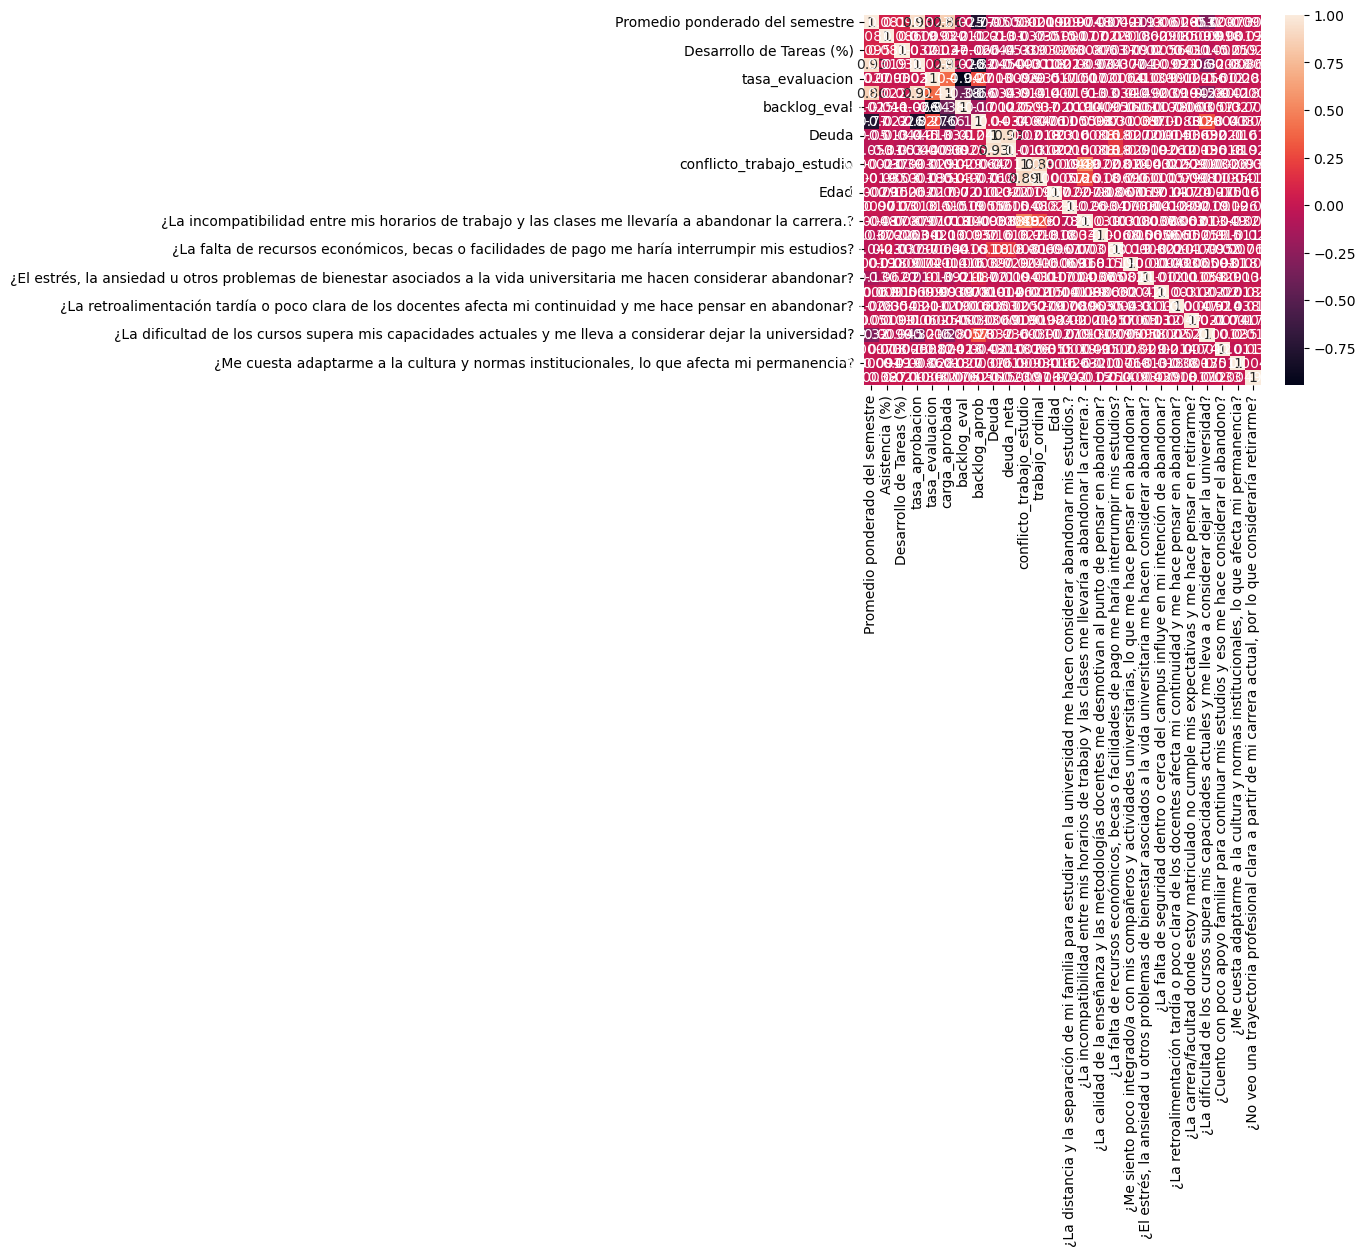

In [49]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [50]:
#Esto es para ver si hay variables categoricas
categor_data.describe()

Formas de Pago Matr√≠cula al d√≠a Becario Situaci√≥n laboral  \
count            5000             5000    5000              5000   
unique              3                2       2                 3   
top           Armadas               S√≠      No        No Trabaja   
freq             2796             4391    4339              2829   

                      Facultad Orden de solicitud  \
count                     5000               5000   
unique                       5                  3   
top     Ciencias Empresariales     Primera Opci√≥n   
freq                      1479               3458   

                   Modo de solicitud Procedencia    Vivienda  \
count                           5000        5000        5000   
unique                             6           3           3   
top     Examen de admisi√≥n ordinario        Lima  Familiares   
freq                            3008        2729        2471   

       Necesidades educativas especiales Trasladado(a) G√©nero  \
count                               5000          5000   5000   
unique                                 2             2      2   
top                                   No            No      M   
freq                                4862          4494   2750   

       Crianza Adventista Estado civil Titulaci√≥n de la madre  \
count                5000         5000                   5000   
unique                  2            2                      5   
top                    S√≠      Soltero             Secundaria   
freq                 3231         4752                   1914   

       Titulaci√≥n del padre            Ocupaci√≥n de la madre  \
count                  5000                             5000   
unique                    5                               10   
top              Secundaria  Ama de casa / labores del hogar   
freq                   1700                              819   

              Ocupaci√≥n del padre Condici√≥n Final  
count                        5000            5000  
unique                         10               2  
top     Comerciantes / vendedores        Graduado  
freq                         1043            3679

In [51]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)

numeric_data.columns: Index(['Promedio ponderado del semestre', 'Asistencia (%)',
       'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion',
       'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda',
       'deuda_neta', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Edad',
       '¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?',
       '¬øLa calidad de la ense√±anza y las metodolog√≠as docentes me desmotivan al punto de pensar en abandonar?',
       '¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?',
       '¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?',
       '¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me ha

### üßπ 5. Data transformation

In [52]:
data=df_clean

In [53]:
# 1) Target binaria robusta
# ---------------------------
# Soporta texto ("Graduado"/"Desert√≥") o c√≥digos (1/2)
if data["Condici√≥n Final"].dtype == "O":
    target_map = {"Graduado": 0, "Desert√≥": 1}
else:
    # Tu convenci√≥n: 1=Graduado ->0 ; 2=Desert√≥ ->1
    target_map = {1: 0, 2: 1}

data["target_deserto"] = data["Condici√≥n Final"].map(target_map)
print(data[["Condici√≥n Final","target_deserto"]].head())
print("Distribuci√≥n de la etiqueta:\n", data["target_deserto"].value_counts(normalize=True).round(3))

  Condici√≥n Final  target_deserto
0        Graduado               0
1        Graduado               0
2        Graduado               0
3        Graduado               0
4        Graduado               0
Distribuci√≥n de la etiqueta:
 target_deserto
0    0.736
1    0.264
Name: proportion, dtype: float64


In [54]:
# 2. One-Hot Encoding a las variables categ√≥ricas
categorical_cols = ['Formas de Pago', 'Matr√≠cula al d√≠a', 'Becario', 'Situaci√≥n laboral',
       'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia',
       'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)',
       'G√©nero', 'Crianza Adventista', 'Estado civil',
       'Titulaci√≥n de la madre', 'Titulaci√≥n del padre',
       'Ocupaci√≥n de la madre', 'Ocupaci√≥n del padre'
]

# Aplicar One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Forma original:", data.shape)
print("Forma con One-Hot Encoding:", data_encoded.shape)
data_encoded.head()

Forma original: (5000, 46)
Forma con One-Hot Encoding: (5000, 80)


Promedio ponderado del semestre  Asistencia (%)  Desarrollo de Tareas (%)  \
0                            16.64            84.0                      83.9   
1                            13.76            80.5                      69.6   
2                             9.95            84.0                      82.5   
3                            16.08            83.8                      83.7   
4                            13.08            81.7                     100.0   

   tasa_aprobacion  tasa_evaluacion  carga_aprobada  backlog_eval  \
0         0.800000         1.000000        0.800000             0   
1         0.800000         0.833333        0.666667             1   
2         0.428571         0.875000        0.375000             1   
3         0.666667         0.750000        0.500000             1   
4         0.571429         0.875000        0.500000             1   

   backlog_aprob    Deuda  deuda_neta  ...  \
0              1  2735.37     2343.24  ...   
1              1  3833.77     3471.58  ...   
2              4  1080.84      559.95  ...   
3              1   779.52      192.28  ...   
4              3   560.90     -152.88  ...   

   Ocupaci√≥n de la madre_Servicios personales y dom√©sticos  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   Ocupaci√≥n del padre_Ama de casa / labores del hogar  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   Ocupaci√≥n del padre_Comerciantes / vendedores  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Ocupaci√≥n del padre_Desempleado / sin ocupaci√≥n  \
0                                            False   
1                                             True   
2                                            False   
3                                            False   
4                                            False   

   Ocupaci√≥n del padre_Empleados administrativos / de oficina  \
0                                              False            
1                                              False            
2                                              False            
3                                              False            
4                                              False            

   Ocupaci√≥n del padre_Militares / polic√≠as / fuerzas del orden  \
0                                              False              
1                                              False              
2                                              False              
3                                              False              
4                                              False              

   Ocupaci√≥n del padre_Obreros / trabajadores manuales  \
0                                              False     
1                                              False     
2                                               True     
3                                              False     
4                                               True     

   Ocupaci√≥n del padre_Otros / no especificado  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Ocupaci√≥n d

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalar la variable Edad
data_encoded['Edad_scaled'] = scaler.fit_transform(data_encoded[['Edad']])

data_encoded[['Edad', 'Edad_scaled']].head()

Edad  Edad_scaled
0    20    -0.519377
1    28     2.084995
2    25     1.108355
3    21    -0.193830
4    23     0.457263

In [58]:
from sklearn.preprocessing import RobustScaler  # <-- FALTABA
# ---------- 1) Escalar m√∫ltiples num√©ricas (robusto a outliers) ----------
numeric_candidates = [
    "Edad",
    "Promedio ponderado del semestre",
    "Asistencia (%)",
    "Desarrollo de Tareas (%)",
    "Deuda", "Descuento", "deuda_neta",
    "tasa_aprobacion", "tasa_evaluacion", "carga_aprobada",
    "backlog_eval", "backlog_aprob",
    "trabajo_ordinal", "conflicto_trabajo_estudio",
]

num_cols_to_scale = [c for c in numeric_candidates if c in data_encoded.columns]
scaler = RobustScaler()
data_encoded[[f"{c}_scaled" for c in num_cols_to_scale]] = scaler.fit_transform(
    data_encoded[num_cols_to_scale]
)

print("Escaladas:", [f"{c}_scaled" for c in num_cols_to_scale][:8], "...")

# ---------- 2) Helper para seleccionar por prefijo ----------
def cols_by_prefix(df, *prefixes):
    prefixes = tuple(prefixes)
    return [c for c in df.columns if c.startswith(prefixes)]

# Ajusta prefijos a tus dummies (con drop_first=True habr√° 1 dummy menos por variable)
group_prefijos = [
    "Facultad_", "Situaci√≥n laboral_", "Modo de solicitud_",
    "Orden de solicitud_", "Matr√≠cula al d√≠a_", "Becario_",
    "Procedencia_", "Vivienda_", "G√©nero_", "Crianza Adventista_",
    "Estado civil_", "Necesidades educativas especiales_",
    "Trasladado(a)_", "Formas de Pago_",
    "Titulaci√≥n de la madre_", "Titulaci√≥n del padre_",
    "Ocupaci√≥n de la madre_", "Ocupaci√≥n del padre_",
]

cat_cols_show = cols_by_prefix(data_encoded, *group_prefijos)

# ---------- 3) Vista r√°pida de columnas transformadas ----------
cols_show = (
    ["target_deserto"] +
    [c for c in data_encoded.columns if c.endswith("_scaled")] +  # todas las escaladas
    cat_cols_show                                                # grupos de dummies
)

print("Columnas a mostrar (muestra):", cols_show[:12], "...")
display(data_encoded[cols_show].head())

Escaladas: ['Edad_scaled', 'Promedio ponderado del semestre_scaled', 'Asistencia (%)_scaled', 'Desarrollo de Tareas (%)_scaled', 'Deuda_scaled', 'deuda_neta_scaled', 'tasa_aprobacion_scaled', 'tasa_evaluacion_scaled'] ...
Columnas a mostrar (muestra): ['target_deserto', 'Edad_scaled', 'Promedio ponderado del semestre_scaled', 'Asistencia (%)_scaled', 'Desarrollo de Tareas (%)_scaled', 'Deuda_scaled', 'deuda_neta_scaled', 'tasa_aprobacion_scaled', 'tasa_evaluacion_scaled', 'carga_aprobada_scaled', 'backlog_eval_scaled', 'backlog_aprob_scaled'] ...


target_deserto  Edad_scaled  Promedio ponderado del semestre_scaled  \
0               0         -0.4                                0.948655   
1               0          1.2                                0.244499   
2               0          0.6                               -0.687042   
3               0         -0.2                                0.811736   
4               0          0.2                                0.078240   

   Asistencia (%)_scaled  Desarrollo de Tareas (%)_scaled  Deuda_scaled  \
0              -0.060870                         0.337615      2.105735   
1              -0.365217                        -0.711927      3.249295   
2              -0.060870                         0.234862      0.383182   
3              -0.078261                         0.322936      0.069474   
4              -0.260870                         1.519266     -0.158135   

   deuda_neta_scaled  tasa_aprobacion_scaled  tasa_evaluacion_scaled  \
0           2.030452                0.533333                    0.00   
1           3.132985                0.533333                   -1.00   
2           0.287950               -0.952381                   -0.75   
3          -0.071311                0.000000                   -1.50   
4          -0.408576               -0.380952                   -0.75   

   carga_aprobada_scaled  ...  \
0               1.066667  ...   
1               0.444444  ...   
2              -0.916667  ...   
3              -0.333333  ...   
4              -0.333333  ...   

   Ocupaci√≥n de la madre_Servicios personales y dom√©sticos  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   Ocupaci√≥n del padre_Ama de casa / labores del hogar  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   Ocupaci√≥n del padre_Comerciantes / vendedores  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Ocupaci√≥n del padre_Desempleado / sin ocupaci√≥n  \
0                                            False   
1                                             True   
2                                            False   
3                                            False   
4                                            False   

   Ocupaci√≥n del padre_Empleados administrativos / de oficina  \
0                                              False            
1                                              False            
2                                              False            
3                                              False            
4                                              False            

   Ocupaci√≥n del padre_Militares / polic√≠as / fuerzas del orden  \
0                                              False              
1                                              False              
2                                              False              
3                                              False              
4                                              False              

   Ocupaci√≥n del padre_Obreros / trabajadores manuales  \
0                                              False     
1                                              False     
2                                               True     
3                                              False     
4                    

In [59]:
# Seleccionar predictores y target original
features_keep = [
    'Formas de Pago', 'Matr√≠cula al d√≠a', 'Becario', 'Situaci√≥n laboral',
       'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia',
       'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)',
       'G√©nero', 'Crianza Adventista', 'Estado civil',
       'Titulaci√≥n de la madre', 'Titulaci√≥n del padre',
       'Ocupaci√≥n de la madre', 'Ocupaci√≥n del padre',
        'Promedio ponderado del semestre', 'Asistencia (%)',
       'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion',
       'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda',
       'deuda_neta', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Edad',
       '¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?',
       '¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?',
       '¬øLa calidad de la ense√±anza y las metodolog√≠as docentes me desmotivan al punto de pensar en abandonar?',
       '¬øLa falta de recursos econ√≥micos, becas o facilidades de pago me har√≠a interrumpir mis estudios?',
       '¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?',
       '¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?',
       '¬øLa falta de seguridad dentro o cerca del campus influye en mi intenci√≥n de abandonar?',
       '¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?',
       '¬øLa carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?',
       '¬øLa dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?',
       '¬øCuento con poco apoyo familiar para continuar mis estudios y eso me hace considerar el abandono?',
       '¬øMe cuesta adaptarme a la cultura y normas institucionales, lo que afecta mi permanencia?',
       '¬øNo veo una trayectoria profesional clara a partir de mi carrera actual, por lo que considerar√≠a retirarme?'
]

target = ["Condici√≥n Final"]

print("features_keep:", features_keep)
print("target:", target)

data = df_clean[features_keep + target].copy()
data.head()

features_keep: ['Formas de Pago', 'Matr√≠cula al d√≠a', 'Becario', 'Situaci√≥n laboral', 'Facultad', 'Orden de solicitud', 'Modo de solicitud', 'Procedencia', 'Vivienda', 'Necesidades educativas especiales', 'Trasladado(a)', 'G√©nero', 'Crianza Adventista', 'Estado civil', 'Titulaci√≥n de la madre', 'Titulaci√≥n del padre', 'Ocupaci√≥n de la madre', 'Ocupaci√≥n del padre', 'Promedio ponderado del semestre', 'Asistencia (%)', 'Desarrollo de Tareas (%)', 'tasa_aprobacion', 'tasa_evaluacion', 'carga_aprobada', 'backlog_eval', 'backlog_aprob', 'Deuda', 'deuda_neta', 'conflicto_trabajo_estudio', 'trabajo_ordinal', 'Edad', '¬øLa distancia y la separaci√≥n de mi familia para estudiar en la universidad me hacen considerar abandonar mis estudios.?', '¬øLa incompatibilidad entre mis horarios de trabajo y las clases me llevar√≠a a abandonar la carrera.?', '¬øLa calidad de la ense√±anza y las metodolog√≠as docentes me desmotivan al punto de pensar en abandonar?', '¬øLa falta de recursos econ√≥mico

Formas de Pago Matr√≠cula al d√≠a Becario Situaci√≥n laboral  \
0        Armadas               S√≠      No        No Trabaja   
1        Armadas               S√≠      No   Tiempo completo   
2        Armadas               S√≠      No   Tiempo completo   
3          Otros               S√≠      S√≠   Tiempo completo   
4        Armadas               No      No        No Trabaja   

                       Facultad Orden de solicitud  \
0                      Teolog√≠a     Segunda Opci√≥n   
1          Ciencias de la Salud     Segunda Opci√≥n   
2  Ciencias Humanas y Educaci√≥n     Primera Opci√≥n   
3        Ciencias Empresariales     Primera Opci√≥n   
4  Ciencias Humanas y Educaci√≥n     Primera Opci√≥n   

              Modo de solicitud Procedencia        Vivienda  \
0               Ingreso directo   Provincia      Residencia   
1  Examen de admisi√≥n ordinario        Lima  Alquila cuarto   
2  Examen de admisi√≥n ordinario        Lima      Familiares   
3               Ingreso directo   Provincia      Familiares   
4  Examen de admisi√≥n ordinario        Lima      Residencia   

  Necesidades educativas especiales  ...  \
0                                No  ...   
1                                No  ...   
2                                No  ...   
3                                No  ...   
4                                No  ...   

  ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
0                                                  2                                                                 
1                                                  3                                                                 
2                                                  1                                                                 
3                                                  3                                                                 
4                                                  5                                                                 

  ¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?  \
0                                                  3                                                                        
1                                                  2                                                                        
2                                                  3                                                                        
3                                                  1                                                                        
4                                                  1                                                                        

  ¬øLa falta de seguridad dentro o cerca del campus influye en mi intenci√≥n de abandonar?  \
0                                                  5                                       
1                                                  1                                       
2                                                  3                                       
3                                                  2                                       
4                                                  3                                       

  ¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?  \
0                                                  2                                                               
1                                                  1                                                               
2                                                  4                                                               
3                                                  2                                                               
4                                

In [62]:
# 6. Calcular correlaciones con la variable objetivo (target_deserto)
# --- 1) Matriz de correlaciones (solo num√©ricas) ---
corr_vars = data_encoded.corr(numeric_only=True)

# --- 2) Ranking con respecto al target (excluye al propio target) ---
corr_with_target = corr_vars["target_deserto"].drop(labels=["target_deserto"]).dropna()
corr_sorted = corr_with_target.sort_values(ascending=False)

print("Top 15 correlaciones POSITIVAS con 'target_deserto' (mayor riesgo de deserci√≥n):")
display(corr_sorted.head(15).to_frame("corr"))

print("\nTop 15 correlaciones NEGATIVAS con 'target_deserto' (protectoras):")
display(corr_sorted.tail(15).to_frame("corr"))



Top 15 correlaciones POSITIVAS con 'target_deserto' (mayor riesgo de deserci√≥n):


corr
backlog_aprob_scaled                                0.089241
backlog_aprob                                       0.089241
Facultad_Ingenier√≠a y Arquitectura                  0.087543
conflicto_trabajo_estudio_scaled                    0.060909
conflicto_trabajo_estudio                           0.060909
trabajo_ordinal_scaled                              0.054360
trabajo_ordinal                                     0.054360
Procedencia_Provincia                               0.044598
¬øLa falta de recursos econ√≥micos, becas o facil...  0.041903
Situaci√≥n laboral_Tiempo completo                   0.040039
Trasladado(a)_S√≠                                    0.033563
Deuda                                               0.024287
Deuda_scaled                                        0.024287
Necesidades educativas especiales_S√≠                0.023647
Modo de solicitud_Ingreso directo                   0.023279


Top 15 correlaciones NEGATIVAS con 'target_deserto' (protectoras):


corr
Situaci√≥n laboral_No Trabaja           -0.052551
Procedencia_Lima                       -0.053754
Becario_S√≠                             -0.058439
carga_aprobada_scaled                  -0.101456
carga_aprobada                         -0.101456
Matr√≠cula al d√≠a_S√≠                    -0.108324
tasa_aprobacion                        -0.109089
tasa_aprobacion_scaled                 -0.109089
Promedio ponderado del semestre_scaled -0.130724
Promedio ponderado del semestre        -0.130724
Facultad_Ciencias de la Salud          -0.147277
Desarrollo de Tareas (%)               -0.253281
Desarrollo de Tareas (%)_scaled        -0.253281
Asistencia (%)                         -0.309616
Asistencia (%)_scaled                  -0.309616

Correlaciones ordenadas con la variable objetivo:


corr
backlog_aprob_scaled                0.089241
backlog_aprob                       0.089241
Facultad_Ingenier√≠a y Arquitectura  0.087543
conflicto_trabajo_estudio_scaled    0.060909
conflicto_trabajo_estudio           0.060909
...                                      ...
Facultad_Ciencias de la Salud      -0.147277
Desarrollo de Tareas (%)           -0.253281
Desarrollo de Tareas (%)_scaled    -0.253281
Asistencia (%)                     -0.309616
Asistencia (%)_scaled              -0.309616

[91 rows x 1 columns]


Correlaciones (deduplicadas scaled/no-scaled), Top 25 por |corr|:


feature      corr  abs_corr  \
77                                     Asistencia (%) -0.309616  0.309616   
76                           Desarrollo de Tareas (%) -0.253281  0.253281   
75                      Facultad_Ciencias de la Salud -0.147277  0.147277   
74                    Promedio ponderado del semestre -0.130724  0.130724   
73                                    tasa_aprobacion -0.109089  0.109089   
72                                Matr√≠cula al d√≠a_S√≠ -0.108324  0.108324   
71                                     carga_aprobada -0.101456  0.101456   
0                                       backlog_aprob  0.089241  0.089241   
1                  Facultad_Ingenier√≠a y Arquitectura  0.087543  0.087543   
2                           conflicto_trabajo_estudio  0.060909  0.060909   
70                                         Becario_S√≠ -0.058439  0.058439   
3                                     trabajo_ordinal  0.054360  0.054360   
69                                   Procedencia_Lima -0.053754  0.053754   
68                       Situaci√≥n laboral_No Trabaja -0.052551  0.052551   
4                               Procedencia_Provincia  0.044598  0.044598   
5   ¬øLa falta de recursos econ√≥micos, becas o faci...  0.041903  0.041903   
6                   Situaci√≥n laboral_Tiempo completo  0.040039  0.040039   
7                                    Trasladado(a)_S√≠  0.033563  0.033563   
67                                  Facultad_Teolog√≠a -0.028385  0.028385   
66                               Formas de Pago_Otros -0.026256  0.026256   
8                                               Deuda  0.024287  0.024287   
9                Necesidades educativas especiales_S√≠  0.023647  0.023647   
10                  Modo de solicitud_Ingreso directo  0.023279  0.023279   
11  ¬øLa dificultad de los cursos supera mis capaci...  0.022980  0.022980   
12  ¬øLa calidad de la ense√±anza y las metodolog√≠as...  0.022900  0.022900   

                                             base_key  
77                                     Asistencia (%)  
76                           Desarrollo de Tareas (%)  
75                      Facultad_Ciencias de la Salud  
74                    Promedio ponderado del semestre  
73                                    tasa_aprobacion  
72                                Matr√≠cula al d√≠a_S√≠  
71                                     carga_aprobada  
0                                       backlog_aprob  
1                  Facultad_Ingenier√≠a y Arquitectura  
2                           conflicto_trabajo_estudio  
70                                         Becario_S√≠  
3                                     trabajo_ordinal  
69                                   Procedencia_Lima  
68                       Situaci√≥n laboral_No Trabaja  
4                               Procedencia_Provincia  
5   ¬øLa falta de recursos econ√≥micos, becas o faci...  
6                   Situaci√≥n laboral_Tiempo completo  
7                                    Trasladado(a)_S√≠  
67                                  Facultad_Teolog√≠a  
66                               Formas de Pago_Otros  
8                                               Deuda  
9                Necesidades educativas especiales_S√≠  
10                  Modo de solicitud_Ingreso directo  
11  ¬øLa dificultad de los cursos supera mis capaci...  
12  ¬øLa calidad de la ense√±anza y las metodolog√≠as...

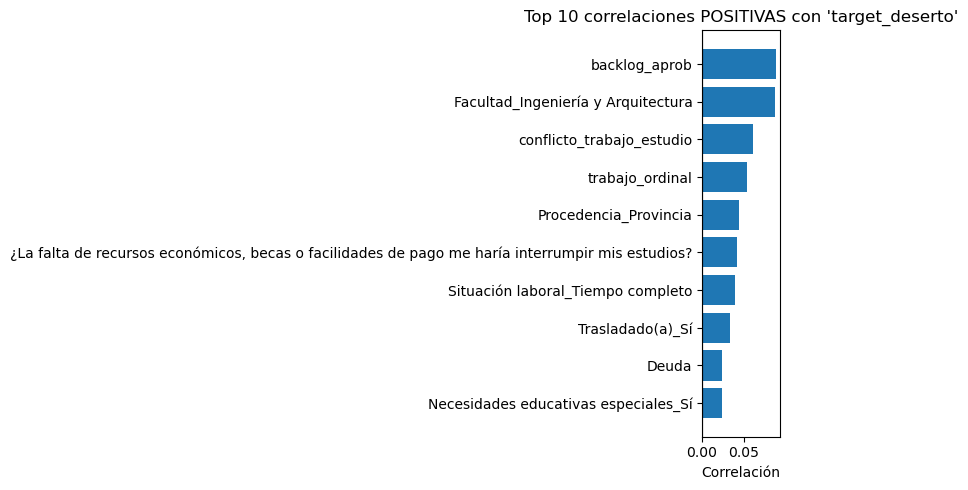

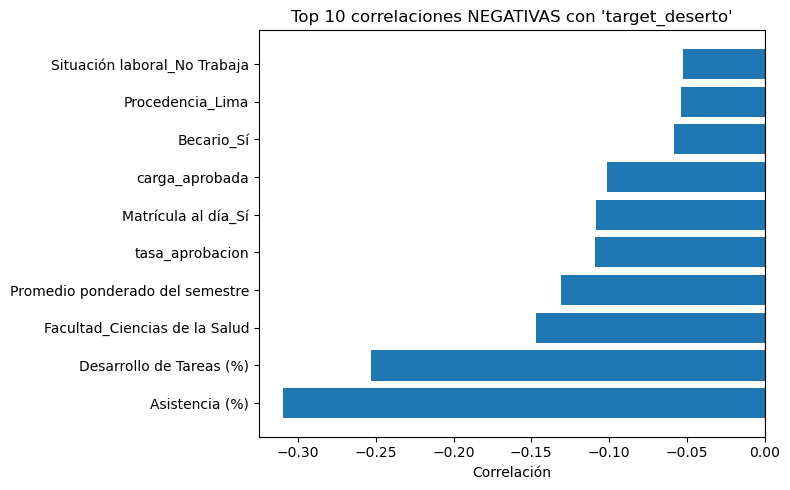

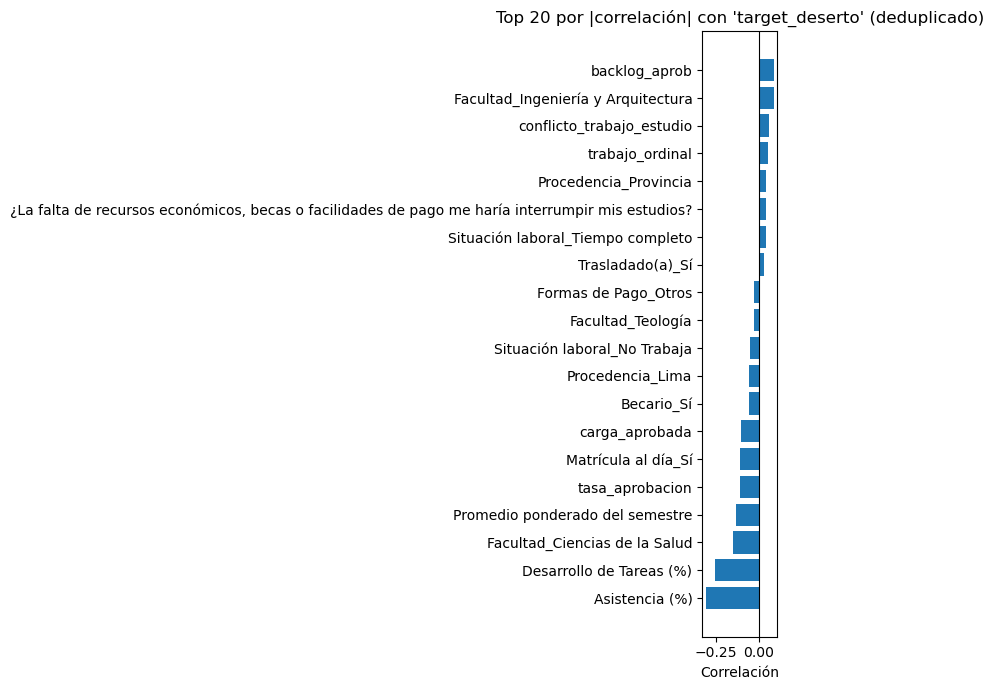

In [66]:
# Correlaciones
# --- 1) Serie ordenada (excluye el propio target) ---
corr_with_target = corr_vars['target_deserto'].drop(labels=['target_deserto']).dropna()
corr_with_target = corr_with_target.sort_values(ascending=False)

print("Correlaciones ordenadas con la variable objetivo:")
display(corr_with_target.to_frame("corr"))

# --- 2) Deduplicar pares *_scaled vs original (conserva el NO escalado si existe) ---
corr_df = corr_with_target.reset_index()
corr_df.columns = ["feature", "corr"]
corr_df["abs_corr"] = corr_df["corr"].abs()

# Regla: si hay 'var' y 'var_scaled', nos quedamos con 'var'
# Creamos una clave base removiendo el sufijo _scaled
corr_df["base_key"] = corr_df["feature"].str.replace(r"_scaled$", "", regex=True)

# Para cada base_key, si existen dos (scaled + no scaled), preferimos el no scaled
# Construimos un ranking: 0 si NO escalado, 1 si escalado
corr_df["is_scaled"] = corr_df["feature"].str.endswith("_scaled").astype(int)

# Nos quedamos con la fila de menor is_scaled (no scaled) para cada base_key;
# si s√≥lo hay una, conserva la que haya.
corr_dedup = (
    corr_df.sort_values(["base_key", "is_scaled"])   # no scaled primero
           .drop_duplicates(subset=["base_key"], keep="first")
           .drop(columns=["is_scaled"])
)

# Orden final por correlaci√≥n (puedes usar abs si prefieres)
corr_dedup_sorted = corr_dedup.sort_values("corr", ascending=False).reset_index(drop=True)

print("\nCorrelaciones (deduplicadas scaled/no-scaled), Top 25 por |corr|:")
topN = 25
display(corr_dedup_sorted.reindex(corr_dedup_sorted["abs_corr"].sort_values(ascending=False).index).head(topN))

# --- 3) Gr√°ficos: Top-10 positivos y Top-10 negativos (deduplicados) ---
top_pos = corr_dedup_sorted.head(10).sort_values("corr")  # de menor a mayor para barh
top_neg = corr_dedup_sorted.tail(10).sort_values("corr")  # aqu√≠ ya son los m√°s negativos

# --- Top 10 correlaciones POSITIVAS con 'target_deserto ---
plt.figure(figsize=(8,5))
plt.barh(top_pos["feature"], top_pos["corr"])
plt.title("Top 10 correlaciones POSITIVAS con 'target_deserto'")
plt.xlabel("Correlaci√≥n")
plt.axvline(0, color="k", lw=0.8)
plt.tight_layout()
plt.show()

# --- Top 10 correlaciones NEGATIVAS con 'target_deserto ---
plt.figure(figsize=(8,5))
plt.barh(top_neg["feature"], top_neg["corr"])
plt.title("Top 10 correlaciones NEGATIVAS con 'target_deserto'")
plt.xlabel("Correlaci√≥n")
plt.axvline(0, color="k", lw=0.8)
plt.tight_layout()
plt.show()

# --- Top 20 correlaciones con 'target_deserto ---
top_abs = corr_dedup_sorted.reindex(corr_dedup_sorted["abs_corr"].sort_values(ascending=False).index).head(20)
top_abs = top_abs.sort_values("corr")  # orden para barh
plt.figure(figsize=(8,7))
plt.barh(top_abs["feature"], top_abs["corr"])
plt.title("Top 20 por |correlaci√≥n| con 'target_deserto' (deduplicado)")
plt.xlabel("Correlaci√≥n")
plt.axvline(0, color="k", lw=0.8)
plt.tight_layout()
plt.show()

#### üìä Interpretaci√≥n de correlaciones

> Nota: son **correlaciones punto-biseriales** (Pearson con etiqueta 0/1). Valores **negativos** indican factores **protectores** (menor probabilidad de deserci√≥n); **positivos**, mayor riesgo. Las magnitudes suelen ser **peque√±as** en problemas con muchas variables y dummies; l√©anse como **se√±ales** y no como efectos causales.

### Se√±ales protectoras (correlaci√≥n NEGATIVA)
- **Asistencia (%)** `r ‚âà -0.31` ‚Üí la mayor se√±al protectora.
- **Desarrollo de Tareas (%)** `r ‚âà -0.25` ‚Üí cumplimiento sostiene la permanencia.
- **Promedio ponderado** `r ‚âà -0.13` y **tasa_aprobacion** `r ‚âà -0.11` ‚Üí mejor rendimiento, menor deserci√≥n.
- **Matr√≠cula al d√≠a = S√≠** `r ‚âà -0.11` ‚Üí regularidad de pagos protege.
- **Facultad = Ciencias de la Salud** `r ‚âà -0.15` ‚Üí perfil m√°s persistente en esta escuela.
- **Becario = S√≠** `r ‚âà -0.06` ‚Üí apoyo financiero asociado a continuidad.
- **Procedencia = Lima** `r ‚âà -0.054` y **Situaci√≥n laboral = No Trabaja** `r ‚âà -0.053` ‚Üí menor riesgo relativo.
- Se√±ales menores adicionales: **Facultad = Teolog√≠a** `r ‚âà -0.028`, **Formas de pago = Otros** `r ‚âà -0.026` (d√©biles).

### Se√±ales de mayor riesgo (correlaci√≥n POSITIVA)
- **backlog_aprob** (evaluadas no aprobadas) `r ‚âà +0.089` ‚Üí rezago acad√©mico ligado a deserci√≥n.
- **Facultad = Ingenier√≠a y Arquitectura** `r ‚âà +0.088` ‚Üí mayor riesgo relativo en esta escuela.
- **conflicto_trabajo_estudio** `r ‚âà +0.061` y **trabajo_ordinal** `r ‚âà +0.054` ‚Üí compatibilidad y carga laboral importan.
- **Procedencia = Provincia** `r ‚âà +0.045` ‚Üí posible efecto de distancia/adaptaci√≥n/recursos.
- **Situaci√≥n laboral = Tiempo completo** `r ‚âà +0.040` ‚Üí trabajar m√°s horas eleva el riesgo.
- **Trasladado(a) = S√≠** `r ‚âà +0.034` y **NEE = S√≠** `r ‚âà +0.024` ‚Üí se√±ales de riesgo moderado.
- **Deuda** `r ‚âà +0.024` ‚Üí presi√≥n financiera contribuye.
- **Modo de solicitud = Ingreso directo** `r ‚âà +0.023` (leve).
- **Likert (auto-percepci√≥n)**:  
  - ‚Äú**Falta de recursos econ√≥micos** ‚Ä¶‚Äù `r ‚âà +0.042`  
  - ‚Äú**Dificultad de cursos** ‚Ä¶‚Äù `r ‚âà +0.023`  
  - ‚Äú**Calidad/metodolog√≠as** ‚Ä¶ desmotivan‚Äù `r ‚âà +0.023`  
  ‚Üí percepciones de **estr√©s acad√©mico/financiero** se alinean con mayor riesgo.

### Lecturas y acciones r√°pidas
- **Ejes cr√≠ticos**: desempe√±o continuo (**Asistencia, Tareas, Promedio**) y **regularidad financiera** (Matr√≠cula, Deuda/Beca).
- **Segmentaci√≥n por Facultad**: refuerzo en **Ing./Arqu.**; Salud exhibe un perfil m√°s persistente.
- **Trabajo‚Äìestudio**: priorizar **horarios flexibles**, tutor√≠as y acompa√±amiento a **tiempo completo**.
- **Origen y transici√≥n**: estudiantes de **Provincia** y **Trasladados** requieren **acompa√±amiento de adaptaci√≥n**.
- **Alertas tempranas**: umbrales en Asistencia (<80‚Äì85%), Tareas bajas, **backlog_aprob** alto, **Matr√≠cula = No**, **conflicto_trabajo_estudio** alto.

> T√©cnica: con dummies (p. ej., `Facultad_X`), el signo depende de la **categor√≠a base** (por `drop_first=True`). Usa estas correlaciones como **priorizaci√≥n** y compl√©talas con **importancia del modelo** (permutaci√≥n/SHAP) tras entrenar.



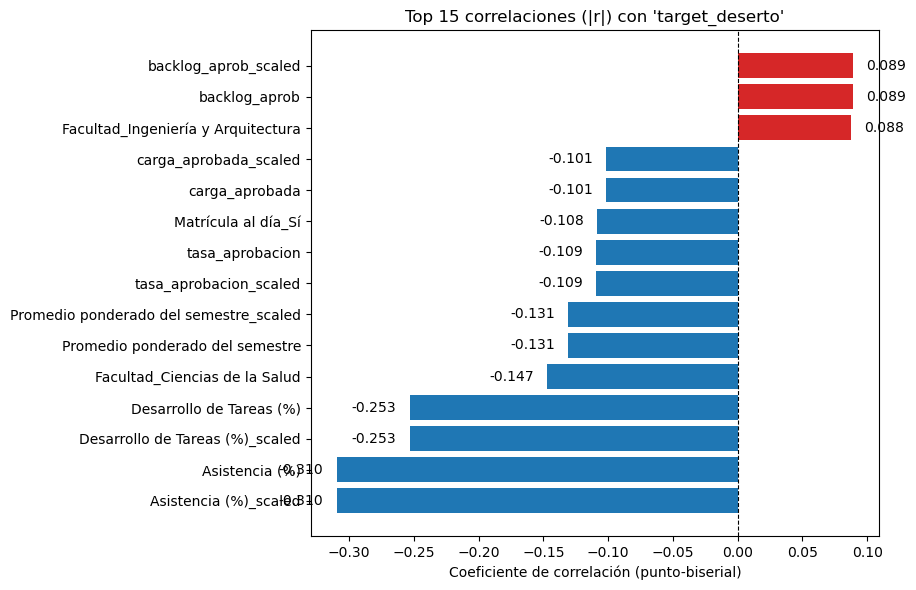

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usa la serie que tengas: corr_with_target (completa) o corr_dedup_sorted (deduplicada)
# --- Si usas corr_with_target (pd.Series) ---
series = corr_with_target.copy()

# Limpieza segura (por si intentas quitar algo que no est√°)
series = series.drop(labels=['target_deserto','Condici√≥n Final'], errors='ignore').dropna()

# Top N por valor absoluto (mezcla positivos y negativos)
topN = 15
top_abs_idx = series.abs().sort_values(ascending=False).head(topN).index
series_top = series.loc[top_abs_idx].sort_values()  # ordenado para barh

# Colores por signo
colors = np.where(series_top.values >= 0, '#d62728', '#1f77b4')  # rojo=riesgo, azul=protector

# Plot
plt.figure(figsize=(9,6))
plt.barh(series_top.index, series_top.values, color=colors)
plt.title(f"Top {topN} correlaciones (|r|) con 'target_deserto'")
plt.xlabel("Coeficiente de correlaci√≥n (punto-biserial)")
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()

# Anotar valores
for y, v in enumerate(series_top.values):
    plt.text(v + (0.01 if v >= 0 else -0.01), y, f"{v:.3f}",
             va='center', ha='left' if v >= 0 else 'right')

plt.show()


## Lectura del ‚ÄúTop 15 por |r|‚Äù con `target_deserto` (deserci√≥n=1)

> Correlaciones punto-biseriales con la etiqueta 0/1. Barras a la **izquierda (‚Äì)** = **protectoras**; a la **derecha (+)** = **mayor riesgo**. Magnitudes moderadas son normales en problemas multivariados.

### Factores protectores (negativos)
- **Asistencia (%) ~ ‚àí0.31** ‚Üí Es la se√±al m√°s fuerte: mayor asistencia se asocia claramente con **menor deserci√≥n**.
- **Desarrollo de Tareas (%) ~ ‚àí0.25** ‚Üí Cumplimiento sostenido protege la continuidad.
- **Facultad = Ciencias de la Salud ~ ‚àí0.15** ‚Üí Perfil m√°s persistente en esta escuela.
- **Promedio ponderado ~ ‚àí0.13** y **tasa_aprobacion ~ ‚àí0.11** ‚Üí Mejor rendimiento acad√©mico reduce el riesgo.
- **Matr√≠cula al d√≠a = S√≠ ~ ‚àí0.11** ‚Üí Regularidad de pagos se alinea con permanencia.
- **carga_aprobada ~ ‚àí0.10** ‚Üí Progreso efectivo en lo matriculado protege.

### Factores de riesgo (positivos)
- **backlog_aprob ~ +0.09** ‚Üí Mayor cantidad de cursos evaluados pero **no aprobados** se asocia con **mayor deserci√≥n** (se√±al de rezago).
- **Facultad = Ingenier√≠a y Arquitectura ~ +0.09** ‚Üí Mayor propensi√≥n relativa a desertar frente a otras facultades (comparado con la categor√≠a base).

> Duplicados ‚Äú_scaled‚Äù y no escalados aparecen juntos porque muestran la misma relaci√≥n (el escalado no cambia el signo). Si prefieres, usa la versi√≥n **deduplicada** para reportes.

### Qu√© implica para acciones/hip√≥tesis
- **Alertas tempranas**: monitorear **Asistencia** (<80‚Äì85%), **Tareas** bajas, **Matr√≠cula=No**, y **backlog_aprob** creciente.
- **Apoyo acad√©mico focalizado**: refuerzos en **Ingenier√≠a/Arquitectura**, tutor√≠as y seguimiento para estudiantes con **tasa_aprobacion** baja.
- **Gesti√≥n financiera**: priorizar casos con **Matr√≠cula atrasada** y trabajar planes de pago.
- **Seguimiento de progreso**: promover **carga_aprobada** sostenida (acompa√±amiento/recuperaciones).

> Recordatorio metodol√≥gico: el signo en dummies (p. ej., *Facultad_X*) depende de la **categor√≠a base** del one-hot. Estas correlaciones sirven para **priorizar**; valida su importancia con el modelo (permutaci√≥n/SHAP) en la etapa de modelado.


In [68]:
# fin del cuaderno ----*-----

In [70]:
data

Formas de Pago Matr√≠cula al d√≠a Becario Situaci√≥n laboral  \
0           Armadas               S√≠      No        No Trabaja   
1           Armadas               S√≠      No   Tiempo completo   
2           Armadas               S√≠      No   Tiempo completo   
3             Otros               S√≠      S√≠   Tiempo completo   
4           Armadas               No      No        No Trabaja   
...             ...              ...     ...               ...   
4995        Contado               S√≠      No      Medio Tiempo   
4996          Otros               S√≠      No   Tiempo completo   
4997        Armadas               S√≠      S√≠        No Trabaja   
4998        Armadas               S√≠      No        No Trabaja   
4999        Armadas               S√≠      S√≠        No Trabaja   

                          Facultad Orden de solicitud  \
0                         Teolog√≠a     Segunda Opci√≥n   
1             Ciencias de la Salud     Segunda Opci√≥n   
2     Ciencias Humanas y Educaci√≥n     Primera Opci√≥n   
3           Ciencias Empresariales     Primera Opci√≥n   
4     Ciencias Humanas y Educaci√≥n     Primera Opci√≥n   
...                            ...                ...   
4995     Ingenier√≠a y Arquitectura     Segunda Opci√≥n   
4996  Ciencias Humanas y Educaci√≥n     Segunda Opci√≥n   
4997     Ingenier√≠a y Arquitectura     Primera Opci√≥n   
4998        Ciencias Empresariales     Primera Opci√≥n   
4999          Ciencias de la Salud     Segunda Opci√≥n   

                 Modo de solicitud Procedencia        Vivienda  \
0                  Ingreso directo   Provincia      Residencia   
1     Examen de admisi√≥n ordinario        Lima  Alquila cuarto   
2     Examen de admisi√≥n ordinario        Lima      Familiares   
3                  Ingreso directo   Provincia      Familiares   
4     Examen de admisi√≥n ordinario        Lima      Residencia   
...                            ...         ...             ...   
4995  Examen de admisi√≥n ordinario   Provincia      Familiares   
4996  Examen de admisi√≥n ordinario        Lima      Familiares   
4997               Ingreso directo        Lima      Familiares   
4998  Examen de admisi√≥n ordinario   Provincia      Residencia   
4999  Examen de admisi√≥n ordinario   Provincia  Alquila cuarto   

     Necesidades educativas especiales  ...  \
0                                   No  ...   
1                                   No  ...   
2                                   No  ...   
3                                   No  ...   
4                                   No  ...   
...                                ...  ...   
4995                                No  ...   
4996                                No  ...   
4997                                S√≠  ...   
4998                                No  ...   
4999                                No  ...   

     ¬øMe siento poco integrado/a con mis compa√±eros y actividades universitarias, lo que me hace pensar en abandonar?  \
0                                                     2                                                                 
1                                                     3                                                                 
2                                                     1                                                                 
3                                                     3                                                                 
4                                                     5                                                                 
...                                                 ...                                                                 
4995                                                  1                                                                 
4996                                                  1                                                                 
4997                                   

In [72]:
# Asegura target binaria a partir de "Condici√≥n Final"
if "target_deserto" not in data.columns:
    if data["Condici√≥n Final"].dtype == "O":
        data["target_deserto"] = data["Condici√≥n Final"].map({"Graduado":0, "Desert√≥":1})
    else:
        data["target_deserto"] = data["Condici√≥n Final"].map({1:0, 2:1})

# --- Funci√≥n gen√©rica para frecuencias + Pareto + tasa y lift ---
def tabla_categorica(df, col, target="target_deserto", ordenar_por="percentage", asc=False):
    tmp = df[[col, target]].copy()
    total = len(tmp)
    # Frecuencia %
    freqs = (tmp[col].value_counts(dropna=False) / total * 100).rename("percentage").to_frame()
    freqs.index = freqs.index.astype(str)

    # Pareto acumulado
    freqs = freqs.sort_values("percentage", ascending=False)
    freqs["cum_%"] = freqs["percentage"].cumsum()

    # Tasa de deserci√≥n por categor√≠a
    tasa = tmp.groupby(col)[target].mean().rename("dropout_rate").to_frame()
    tasa.index = tasa.index.astype(str)

    # Mezcla
    out = freqs.join(tasa, how="left")

    # Lift vs tasa global
    tasa_global = tmp[target].mean()
    out["lift"] = out["dropout_rate"] / tasa_global

    # Orden final
    if ordenar_por in out.columns:
        out = out.sort_values(ordenar_por, ascending=asc)
    return out

# --- Variables categ√≥ricas sugeridas adem√°s de "Facultad" ---
cat_vars = [
    "Situaci√≥n laboral", "Procedencia", "Modo de solicitud", "Vivienda",
    "Formas de Pago", "Matr√≠cula al d√≠a", "Becario",
    "Trasladado(a)", "Necesidades educativas especiales",
    "G√©nero", "Estado civil",
    "Titulaci√≥n de la madre", "Titulaci√≥n del padre",
    "Ocupaci√≥n de la madre", "Ocupaci√≥n del padre"
]
cat_vars = [c for c in cat_vars if c in data.columns]  # solo las presentes

# --- Ejemplo: tu tabla actual de Facultad (extendida) ---
tabla_facultad = tabla_categorica(data, "Facultad")
display(tabla_facultad.head(10))

# --- Generar tablas para el resto y mostrarlas (Top 10) ---
tablas_cat = {}
for c in cat_vars:
    tablas_cat[c] = tabla_categorica(data, c)
    print(f"\n== {c} ==")
    display(tablas_cat[c].head(10))


percentage   cum_%  dropout_rate      lift
Facultad                                                                
Ciencias Empresariales             29.58   29.58      0.291413  1.103002
Ingenier√≠a y Arquitectura          27.68   57.26      0.326590  1.236145
Ciencias de la Salud               20.34   77.60      0.135693  0.513600
Ciencias Humanas y Educaci√≥n       18.62   96.22      0.281418  1.065170
Teolog√≠a                            3.78  100.00      0.201058  0.761008


== Situaci√≥n laboral ==


percentage   cum_%  dropout_rate      lift
Situaci√≥n laboral                                            
No Trabaja              56.58   56.58      0.243902  0.923174
Medio Tiempo            27.40   83.98      0.282482  1.069197
Tiempo completo         16.02  100.00      0.304619  1.152987


== Procedencia ==


percentage   cum_%  dropout_rate      lift
Procedencia                                            
Lima              54.58   54.58      0.242580  0.918167
Provincia         40.48   95.06      0.288043  1.090248
Extranjero         4.94  100.00      0.307692  1.164619


== Modo de solicitud ==


percentage   cum_%  dropout_rate  \
Modo de solicitud                                                        
Examen de admisi√≥n ordinario               60.16   60.16      0.255319   
Ingreso directo                            20.02   80.18      0.284715   
Ingreso por convenio o beca especial        7.12   87.30      0.278090   
Ingreso por traslado externo                4.60   91.90      0.239130   
Ingreso por traslado interno                4.20   96.10      0.257143   
Ingreso por reingreso                       3.90  100.00      0.307692   

                                          lift  
Modo de solicitud                               
Examen de admisi√≥n ordinario          0.966386  
Ingreso directo                       1.077651  
Ingreso por convenio o beca especial  1.052573  
Ingreso por traslado externo          0.905111  
Ingreso por traslado interno          0.973289  
Ingreso por reingreso                 1.164619


== Vivienda ==


percentage   cum_%  dropout_rate      lift
Vivienda                                                  
Familiares           49.42   49.42      0.261433  0.989525
Alquila cuarto       25.60   75.02      0.272656  1.032007
Residencia           24.98  100.00      0.261009  0.987921


== Formas de Pago ==


percentage   cum_%  dropout_rate      lift
Formas de Pago                                            
Armadas              55.92   55.92      0.268956  1.018000
Contado              34.30   90.22      0.266472  1.008601
Otros                 9.78  100.00      0.229039  0.866915


== Matr√≠cula al d√≠a ==


percentage   cum_%  dropout_rate      lift
Matr√≠cula al d√≠a                                            
S√≠                     87.82   87.82      0.246413  0.932676
No                     12.18  100.00      0.392447  1.485415


== Becario ==


percentage   cum_%  dropout_rate      lift
Becario                                            
No            86.78   86.78      0.274257  1.038065
S√≠            13.22  100.00      0.198185  0.750131


== Trasladado(a) ==


percentage   cum_%  dropout_rate      lift
Trasladado(a)                                            
No                  89.88   89.88      0.259235  0.981206
S√≠                  10.12  100.00      0.308300  1.166920


== Necesidades educativas especiales ==


percentage   cum_%  dropout_rate      lift
Necesidades educativas especiales                                            
No                                      97.24   97.24      0.262443  0.993351
S√≠                                       2.76  100.00      0.326087  1.234243


== G√©nero ==


percentage  cum_%  dropout_rate      lift
G√©nero                                           
M             55.0   55.0      0.261091  0.988232
H             45.0  100.0      0.268000  1.014383


== Estado civil ==


percentage   cum_%  dropout_rate      lift
Estado civil                                            
Soltero            95.04   95.04      0.262626  0.994043
Casado              4.96  100.00      0.294355  1.114136


== Titulaci√≥n de la madre ==


percentage   cum_%  dropout_rate      lift
Titulaci√≥n de la madre                                            
Secundaria                   38.28   38.28      0.267503  1.012500
T√©cnica                      25.36   63.64      0.273659  1.035804
Educaci√≥n Superior           21.00   84.64      0.247619  0.937241
Primaria                     11.78   96.42      0.263158  0.996056
Sin estudios                  3.58  100.00      0.262570  0.993830


== Titulaci√≥n del padre ==


percentage   cum_%  dropout_rate      lift
Titulaci√≥n del padre                                            
Secundaria                 34.00   34.00      0.264118  0.999688
Educaci√≥n Superior         28.22   62.22      0.270730  1.024716
T√©cnica                    22.76   84.98      0.266257  1.007784
Primaria                   12.22   97.20      0.240589  0.910633
Sin estudios                2.80  100.00      0.285714  1.081432


== Ocupaci√≥n de la madre ==


percentage   cum_%  dropout_rate  \
Ocupaci√≥n de la madre                                                        
Ama de casa / labores del hogar                16.38   16.38      0.262515   
Servicios personales y dom√©sticos              16.12   32.50      0.270471   
Comerciantes / vendedores                      15.84   48.34      0.252525   
Profesionales y t√©cnicos                       13.32   61.66      0.256757   
Obreros / trabajadores manuales                12.16   73.82      0.243421   
Empleados administrativos / de oficina          9.80   83.62      0.269388   
Agricultores / ganaderos / pescadores           6.36   89.98      0.289308   
Desempleado / sin ocupaci√≥n                     4.94   94.92      0.283401   
Otros / no especificado                         2.92   97.84      0.301370   
Militares / polic√≠as / fuerzas del orden        2.16  100.00      0.287037   

                                              lift  
Ocupaci√≥n de la madre                               
Ama de casa / labores del hogar           0.993623  
Servicios personales y dom√©sticos         1.023738  
Comerciantes / vendedores                 0.955811  
Profesionales y t√©cnicos                  0.971827  
Obreros / trabajadores manuales           0.921351  
Empleados administrativos / de oficina    1.019636  
Agricultores / ganaderos / pescadores     1.095035  
Desempleado / sin ocupaci√≥n               1.072675  
Otros / no especificado                   1.140688  
Militares / polic√≠as / fuerzas del orden  1.086438


== Ocupaci√≥n del padre ==


percentage   cum_%  dropout_rate  \
Ocupaci√≥n del padre                                                          
Comerciantes / vendedores                      20.86   20.86      0.250240   
Obreros / trabajadores manuales                20.86   41.72      0.276127   
Profesionales y t√©cnicos                       15.50   57.22      0.259355   
Desempleado / sin ocupaci√≥n                     9.44   66.66      0.247881   
Empleados administrativos / de oficina          9.26   75.92      0.285097   
Servicios personales y dom√©sticos               8.42   84.34      0.242280   
Agricultores / ganaderos / pescadores           6.94   91.28      0.291066   
Otros / no especificado                         3.84   95.12      0.307292   
Militares / polic√≠as / fuerzas del orden        2.90   98.02      0.255172   
Ama de casa / labores del hogar                 1.98  100.00      0.232323   

                                              lift  
Ocupaci√≥n del padre                                 
Comerciantes / vendedores                 0.947160  
Obreros / trabajadores manuales           1.045142  
Profesionales y t√©cnicos                  0.981661  
Desempleado / sin ocupaci√≥n               0.938234  
Empleados administrativos / de oficina    1.079096  
Servicios personales y dom√©sticos         0.917034  
Agricultores / ganaderos / pescadores     1.101689  
Otros / no especificado                   1.163102  
Militares / polic√≠as / fuerzas del orden  0.965830  
Ama de casa / labores del hogar           0.879346

In [73]:
# Guardar dataset limpio (sin transformaciones adicionales)
data.to_csv("upeu_data_clean.csv", index=False)
print("‚úÖ Dataset limpio guardado como upeu_data_clean.csv")

# Guardar dataset ya transformado (One-Hot Encoding, escalado, etc.)
data_encoded.to_csv("upeu_data_encoded.csv", index=False)
print("‚úÖ Dataset transformado guardado como upeu_data_encoded.csv")


‚úÖ Dataset limpio guardado como upeu_data_clean.csv
‚úÖ Dataset transformado guardado como upeu_data_encoded.csv


### ‚úÖ  6. Data validation (Sesi√≥n 4)

Aqu√≠ buscamos quedarnos con las variables m√°s √∫tiles, eliminando redundantes o irrelevantes, para que el modelo sea eficiente y evite ruido.

In [74]:
# Cargar dataset limpio
df = pd.read_csv("upeu_data_clean.csv")
print("Forma del dataset limpio:", df.shape)
df.head()


Forma del dataset limpio: (5000, 46)


Formas de Pago Matr√≠cula al d√≠a Becario Situaci√≥n laboral  \
0        Armadas               S√≠      No        No Trabaja   
1        Armadas               S√≠      No   Tiempo completo   
2        Armadas               S√≠      No   Tiempo completo   
3          Otros               S√≠      S√≠   Tiempo completo   
4        Armadas               No      No        No Trabaja   

                       Facultad Orden de solicitud  \
0                      Teolog√≠a     Segunda Opci√≥n   
1          Ciencias de la Salud     Segunda Opci√≥n   
2  Ciencias Humanas y Educaci√≥n     Primera Opci√≥n   
3        Ciencias Empresariales     Primera Opci√≥n   
4  Ciencias Humanas y Educaci√≥n     Primera Opci√≥n   

              Modo de solicitud Procedencia        Vivienda  \
0               Ingreso directo   Provincia      Residencia   
1  Examen de admisi√≥n ordinario        Lima  Alquila cuarto   
2  Examen de admisi√≥n ordinario        Lima      Familiares   
3               Ingreso directo   Provincia      Familiares   
4  Examen de admisi√≥n ordinario        Lima      Residencia   

  Necesidades educativas especiales  ...  \
0                                No  ...   
1                                No  ...   
2                                No  ...   
3                                No  ...   
4                                No  ...   

  ¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?  \
0                                                  3                                                                        
1                                                  2                                                                        
2                                                  3                                                                        
3                                                  1                                                                        
4                                                  1                                                                        

  ¬øLa falta de seguridad dentro o cerca del campus influye en mi intenci√≥n de abandonar?  \
0                                                  5                                       
1                                                  1                                       
2                                                  3                                       
3                                                  2                                       
4                                                  3                                       

  ¬øLa retroalimentaci√≥n tard√≠a o poco clara de los docentes afecta mi continuidad y me hace pensar en abandonar?  \
0                                                  2                                                               
1                                                  1                                                               
2                                                  4                                                               
3                                                  2                                                               
4                                                  2                                                               

  ¬øLa carrera/facultad donde estoy matriculado no cumple mis expectativas y me hace pensar en retirarme?  \
0                                                  3                                                       
1                                                  5                                                       
2                                                  5                                                       
3                                                  4                                                       
4                                                  2                                  

In [75]:
# Cargar dataset transformado
df_encoded = pd.read_csv("upeu_data_encoded.csv")
print("Forma del dataset transformado:", df_encoded.shape)
df_encoded.head()


Forma del dataset transformado: (5000, 93)


Promedio ponderado del semestre  Asistencia (%)  Desarrollo de Tareas (%)  \
0                            16.64            84.0                      83.9   
1                            13.76            80.5                      69.6   
2                             9.95            84.0                      82.5   
3                            16.08            83.8                      83.7   
4                            13.08            81.7                     100.0   

   tasa_aprobacion  tasa_evaluacion  carga_aprobada  backlog_eval  \
0         0.800000         1.000000        0.800000             0   
1         0.800000         0.833333        0.666667             1   
2         0.428571         0.875000        0.375000             1   
3         0.666667         0.750000        0.500000             1   
4         0.571429         0.875000        0.500000             1   

   backlog_aprob    Deuda  deuda_neta  ...  Desarrollo de Tareas (%)_scaled  \
0              1  2735.37     2343.24  ...                         0.337615   
1              1  3833.77     3471.58  ...                        -0.711927   
2              4  1080.84      559.95  ...                         0.234862   
3              1   779.52      192.28  ...                         0.322936   
4              3   560.90     -152.88  ...                         1.519266   

   Deuda_scaled  deuda_neta_scaled  tasa_aprobacion_scaled  \
0      2.105735           2.030452                0.533333   
1      3.249295           3.132985                0.533333   
2      0.383182           0.287950               -0.952381   
3      0.069474          -0.071311                0.000000   
4     -0.158135          -0.408576               -0.380952   

   tasa_evaluacion_scaled  carga_aprobada_scaled  backlog_eval_scaled  \
0                    0.00               1.066667                  0.0   
1                   -1.00               0.444444                  1.0   
2                   -0.75              -0.916667                  1.0   
3                   -1.50              -0.333333                  1.0   
4                   -0.75              -0.333333                  1.0   

   backlog_aprob_scaled  trabajo_ordinal_scaled  \
0                  -0.5                     0.0   
1                  -0.5                     2.0   
2                   1.0                     2.0   
3                  -0.5                     2.0   
4                   0.5                     0.0   

   conflicto_trabajo_estudio_scaled  
0                               0.0  
1                               2.5  
2                               0.5  
3                               2.5  
4                               0.0  

[5 rows x 93 columns]

In [77]:
# Seleccionar columnas relevantes para mostrar
cols_show = ['target_deserto', 'Edad_scaled'] + \
            [col for col in data_encoded.columns if col.startswith('Facultad_') or 
                                                   col.startswith('G√©nero_') or 
                                                   col.startswith('Modo de solicitud_') or
                                                   col.startswith('Estado civil_')]

data_encoded[cols_show].head()


target_deserto  Edad_scaled  Facultad_Ciencias Humanas y Educaci√≥n  \
0               0         -0.4                                  False   
1               0          1.2                                  False   
2               0          0.6                                   True   
3               0         -0.2                                  False   
4               0          0.2                                   True   

   Facultad_Ciencias de la Salud  Facultad_Ingenier√≠a y Arquitectura  \
0                          False                               False   
1                           True                               False   
2                          False                               False   
3                          False                               False   
4                          False                               False   

   Facultad_Teolog√≠a  Modo de solicitud_Ingreso directo  \
0               True                               True   
1              False                              False   
2              False                              False   
3              False                               True   
4              False                              False   

   Modo de solicitud_Ingreso por convenio o beca especial  \
0                                              False        
1                                              False        
2                                              False        
3                                              False        
4                                              False        

   Modo de solicitud_Ingreso por reingreso  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   Modo de solicitud_Ingreso por traslado externo  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Modo de solicitud_Ingreso por traslado interno  G√©nero_M  \
0                                           False      True   
1                                           False     False   
2                                           False     False   
3                                           False     False   
4                                           False     False   

   Estado civil_Soltero  
0                  True  
1                  True  
2                  True  
3                  True  
4                  True

/tmp/ipykernel_44/3470081458.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient="h")
/tmp/ipykernel_44/3470081458.py:35: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient="h")


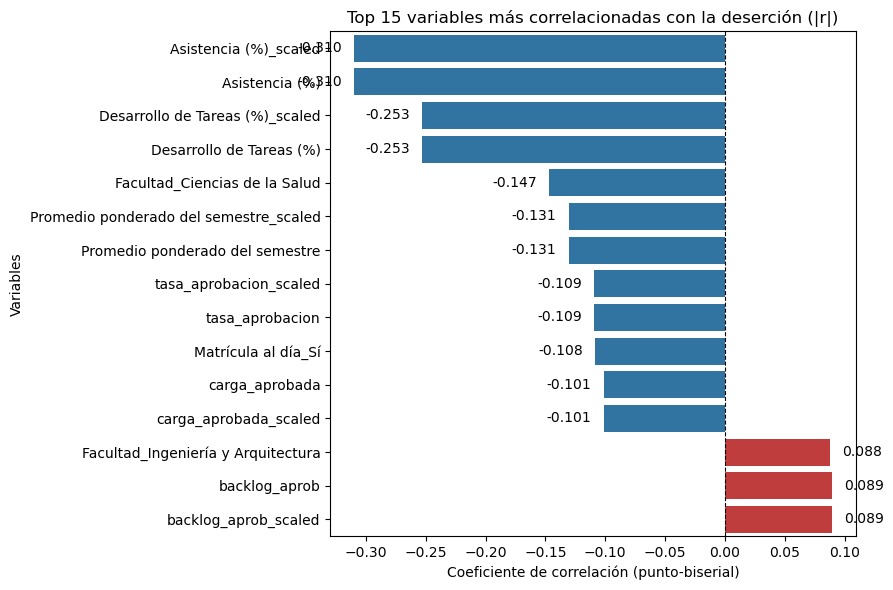

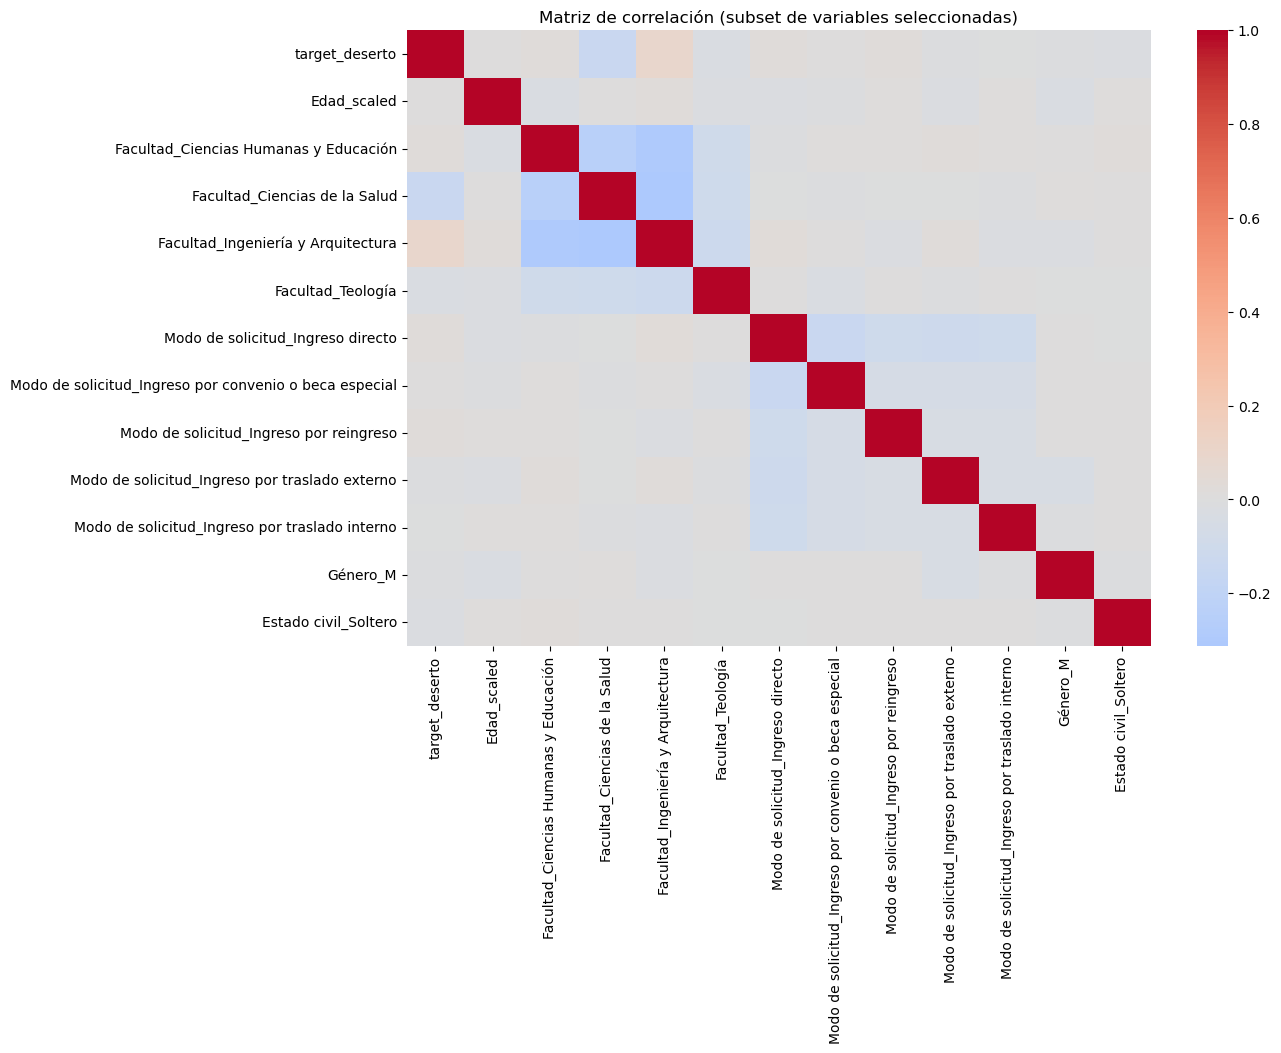

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlaci√≥n solo en las columnas seleccionadas
#corr = data_encoded[cols_show].corr()

# --- 1) Si NO tienes cols_show definido para df_encoded, lo armamos r√°pido ---
if "cols_show" not in locals():
    prefixes = ("Facultad_", "G√©nero_", "Modo de solicitud_", "Estado civil_")
    cols_show = []
    if "target_deserto" in df_encoded.columns:
        cols_show.append("target_deserto")
    if "Edad_scaled" in df_encoded.columns:
        cols_show.append("Edad_scaled")
    cols_show += [c for c in df_encoded.columns if c.startswith(prefixes)]

# --- 2) Correlaci√≥n del target con TODAS las num√©ricas en df_encoded ---
assert "target_deserto" in df_encoded.columns, "Falta 'target_deserto' en df_encoded."

corr_vars = df_encoded.corr(numeric_only=True)
corr_target = (
    corr_vars["target_deserto"]
    .drop(labels=["target_deserto"], errors="ignore")
    .dropna()
    .sort_values(ascending=False)
)

# --- 3) Top-15 por |corr| (manteniendo signo) ---
topN = 15
top_idx = corr_target.abs().sort_values(ascending=False).head(topN).index
top_corr = corr_target.loc[top_idx].sort_values()  # ordenar para barh

plt.figure(figsize=(9,6))
colors = np.where(top_corr.values >= 0, "#d62728", "#1f77b4")  # rojo = mayor riesgo, azul = protector
sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors, orient="h")
plt.title(f"Top {topN} variables m√°s correlacionadas con la deserci√≥n (|r|)")
plt.xlabel("Coeficiente de correlaci√≥n (punto-biserial)")
plt.ylabel("Variables")
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
for y, v in enumerate(top_corr.values):
    plt.text(v + (0.01 if v >= 0 else -0.01), y, f"{v:.3f}",
             va="center", ha="left" if v >= 0 else "right")
plt.tight_layout()
plt.show()

# --- 4) (Opcional) Heatmap solo con tus columnas seleccionadas ---
cols_sel = [c for c in cols_show if c in df_encoded.columns]
if len(cols_sel) >= 2:
    corr_sel = df_encoded[cols_sel].corr(numeric_only=True)
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_sel, annot=False, cmap="coolwarm", center=0)
    plt.title("Matriz de correlaci√≥n (subset de variables seleccionadas)")
    plt.show()
else:
    print("Aviso: hay menos de 2 columnas v√°lidas en cols_show para el heatmap.")



In [81]:
#Ordenar las correlaciones

# 1) Matriz de correlaciones (solo num√©ricas)
corr = df_encoded.corr(numeric_only=True)

# 2) Serie ordenada vs el target (excluye al propio target)
corr_target_sorted = (
    corr["target_deserto"]
    .drop(labels=["target_deserto"], errors="ignore")
    .sort_values(ascending=False)
)

print("Correlaciones con target_deserto (desc):")
display(corr_target_sorted)

# (Opcional) Top-N por |correlaci√≥n|
topN = 20
corr_target_topabs = corr_target_sorted.reindex(
    corr_target_sorted.abs().sort_values(ascending=False).head(topN).index
)
print(f"\nTop {topN} por |correlaci√≥n| con target_deserto:")
display(corr_target_topabs)


Correlaciones con target_deserto (desc):


backlog_aprob_scaled                  0.089241
backlog_aprob                         0.089241
Facultad_Ingenier√≠a y Arquitectura    0.087543
conflicto_trabajo_estudio_scaled      0.060909
conflicto_trabajo_estudio             0.060909
                                        ...   
Facultad_Ciencias de la Salud        -0.147277
Desarrollo de Tareas (%)             -0.253281
Desarrollo de Tareas (%)_scaled      -0.253281
Asistencia (%)                       -0.309616
Asistencia (%)_scaled                -0.309616
Name: target_deserto, Length: 91, dtype: float64


Top 20 por |correlaci√≥n| con target_deserto:


Asistencia (%)_scaled                    -0.309616
Asistencia (%)                           -0.309616
Desarrollo de Tareas (%)_scaled          -0.253281
Desarrollo de Tareas (%)                 -0.253281
Facultad_Ciencias de la Salud            -0.147277
Promedio ponderado del semestre_scaled   -0.130724
Promedio ponderado del semestre          -0.130724
tasa_aprobacion_scaled                   -0.109089
tasa_aprobacion                          -0.109089
Matr√≠cula al d√≠a_S√≠                      -0.108324
carga_aprobada                           -0.101456
carga_aprobada_scaled                    -0.101456
backlog_aprob_scaled                      0.089241
backlog_aprob                             0.089241
Facultad_Ingenier√≠a y Arquitectura        0.087543
conflicto_trabajo_estudio                 0.060909
conflicto_trabajo_estudio_scaled          0.060909
Becario_S√≠                               -0.058439
trabajo_ordinal_scaled                    0.054360
trabajo_ordinal           

#####  Selecci√≥n final de variables

In [82]:
TARGET = "target_deserto"

# 1) Columnas candidatas: todas menos el target y la etiqueta original
candidates = [c for c in data_encoded.columns if c not in [TARGET, "Condici√≥n Final"]]

# 2) Correlaci√≥n (absoluta) de cada feature con el target
corr_with_target = data_encoded[candidates + [TARGET]].corr()[TARGET].drop(TARGET).abs()

# --- Par√°metros de selecci√≥n ---
# Umbral m√≠nimo de correlaci√≥n con el target (aj√∫stalo si lo deseas)
MIN_ABS_CORR = 0.02  # 0.02 ~ 2% de efecto lineal; antes de modelado suele ser un buen filtro inicial
# N√∫mero m√°ximo de features por si prefieres top-k adem√°s del umbral (opcional)
TOP_K = None  # por ejemplo 30; d√©jalo en None para usar solo el umbral

# 3) Seleccionar por umbral (y opcionalmente por top-k)
selected_by_corr = corr_with_target[corr_with_target >= MIN_ABS_CORR].sort_values(ascending=False)
if TOP_K is not None and len(selected_by_corr) > TOP_K:
    selected_by_corr = selected_by_corr.head(TOP_K)

selected_features = selected_by_corr.index.tolist()

print("‚ñ∂ Features seleccionadas por correlaci√≥n (>= {:.3f}): {}"
      .format(MIN_ABS_CORR, len(selected_features)))
print(selected_by_corr)

# 4) (Opcional pero recomendado) eliminar colinealidad alta entre seleccionadas
#    Regla simple: si |corr| > 0.90, nos quedamos con la que tenga mayor correlaci√≥n con el target.
if len(selected_features) > 1:
    corr_mat = data_encoded[selected_features].corr().abs()
    # Acabamos con una estrategia greedy
    to_drop_highcorr = set()
    # Ordenar por importancia (corr con target) para preservar las m√°s √∫tiles
    ordered = selected_by_corr.index.tolist()
    kept = []
    for feat in ordered:
        if feat in to_drop_highcorr:
            continue
        kept.append(feat)
        # Marcar para eliminar otras muy colineales con 'feat'
        highly_corr = corr_mat.index[(corr_mat[feat] > 0.90) & (corr_mat.index != feat)].tolist()
        for hc in highly_corr:
            to_drop_highcorr.add(hc)

    final_features = [f for f in kept if f not in to_drop_highcorr]
else:
    final_features = selected_features

print("\n‚ùå Eliminadas por colinealidad (>0.90):", sorted(list(set(selected_features) - set(final_features))))
print("‚úÖ Features finales:", len(final_features))

# 5) Construir el dataset final para modelar
df_final = data_encoded[final_features + [TARGET]].copy()
print("Dimensiones finales:", df_final.shape)

# Vista r√°pida
df_final.head()

‚ñ∂ Features seleccionadas por correlaci√≥n (>= 0.020): 39
Asistencia (%)_scaled                                                                                                      0.309616
Asistencia (%)                                                                                                             0.309616
Desarrollo de Tareas (%)_scaled                                                                                            0.253281
Desarrollo de Tareas (%)                                                                                                   0.253281
Facultad_Ciencias de la Salud                                                                                              0.147277
Promedio ponderado del semestre                                                                                            0.130724
Promedio ponderado del semestre_scaled                                                                                     0.130724
tasa_aprobacion_s

Asistencia (%)_scaled  Desarrollo de Tareas (%)_scaled  \
0              -0.060870                         0.337615   
1              -0.365217                        -0.711927   
2              -0.060870                         0.234862   
3              -0.078261                         0.322936   
4              -0.260870                         1.519266   

   Facultad_Ciencias de la Salud  Promedio ponderado del semestre  \
0                          False                            16.64   
1                           True                            13.76   
2                          False                             9.95   
3                          False                            16.08   
4                          False                            13.08   

   Matr√≠cula al d√≠a_S√≠  carga_aprobada  backlog_aprob_scaled  \
0                 True        0.800000                  -0.5   
1                 True        0.666667                  -0.5   
2                 True        0.375000                   1.0   
3                 True        0.500000                  -0.5   
4                False        0.500000                   0.5   

   Facultad_Ingenier√≠a y Arquitectura  conflicto_trabajo_estudio_scaled  \
0                               False                               0.0   
1                               False                               2.5   
2                               False                               0.5   
3                               False                               2.5   
4                               False                               0.0   

   Becario_S√≠  ...  Formas de Pago_Otros    Deuda  \
0       False  ...                 False  2735.37   
1       False  ...                 False  3833.77   
2       False  ...                 False  1080.84   
3        True  ...                  True   779.52   
4       False  ...                 False   560.90   

   Necesidades educativas especiales_S√≠  Modo de solicitud_Ingreso directo  \
0                                 False                               True   
1                                 False                              False   
2                                 False                              False   
3                                 False                               True   
4                                 False                              False   

   ¬øLa dificultad de los cursos supera mis capacidades actuales y me lleva a considerar dejar la universidad?  \
0                                                  3                                                            
1                                                  2                                                            
2                                                  5                                                            
3                                                  3                                                            
4                                                  4                                                            

   ¬øLa calidad de la ense√±anza y las metodolog√≠as docentes me desmotivan al punto de pensar en abandonar?  \
0                                                  5                                                        
1                                                  3                                                        
2                                                  5                                                        
3                                                  1                                                        
4                                                  1                                                        

   ¬øEl estr√©s, la ansiedad u otros problemas de bienestar asociados a la vida universitaria me hacen considerar abandonar?  \
0                                                  3                                                                         

## Resumen de selecci√≥n por correlaci√≥n + colinealidad

**Lo que qued√≥ (‚â• 0.02 |r|):**  
- **Desempe√±o/seguimiento:** Asistencia (%), Desarrollo de Tareas (%), Promedio, tasa_aprobacion, carga_aprobada, backlog_aprob.  
- **Finanzas/administrativo:** Matr√≠cula al d√≠a (protector), Deuda/deuda_neta (riesgo moderado), Becario (protector).  
- **Trabajo:** trabajo_ordinal, conflicto_trabajo_estudio, Situaci√≥n laboral (Tiempo completo ‚Üë riesgo).  
- **Contexto:** Facultad (Salud ‚Üì riesgo, Ing./Arq. ‚Üë riesgo), Procedencia (Lima ‚Üì, Provincia ‚Üë).  
- **Percepci√≥n (Likert):** recursos econ√≥micos, dificultad de cursos, calidad/metodolog√≠as, estr√©s (efectos peque√±os pero consistentes).

**Por qu√© se eliminaron algunas:**  
- **Duplicadas** (versi√≥n `_scaled` vs. cruda) o **casi id√©nticas** (p. ej., tasa_aprobacion vs. carga_aprobada/backlog_aprob).  
- **Dummies complementarias** del mismo campo (p. ej., Procedencia_Lima vs. _Provincia) para evitar colinealidad > 0.90.  
- Se conserva la **m√°s informativa** frente al target.

**Resultado:**  
- **25 variables finales** (df_final con 5000 √ó 26). Mantiene los ejes clave: **desempe√±o**, **finanzas**, **trabajo**, **facultad/procedencia** y **percepci√≥n**.

**Notas y pr√≥ximos pasos:**  
- Para **predicci√≥n temprana**, considerar excluir tasas/backlogs (posible **fuga temporal**).  
- Validar con **importancia por permutaci√≥n** o **SHAP** y ajustar umbrales (|r| 0.015‚Äì0.03; colinealidad 0.85‚Äì0.95).  
- Comparar un set ‚Äútemprano‚Äù (sin progreso) vs. ‚Äúcompleto‚Äù (con progreso).


In [83]:
df_final

Asistencia (%)_scaled  Desarrollo de Tareas (%)_scaled  \
0                 -0.060870                         0.337615   
1                 -0.365217                        -0.711927   
2                 -0.060870                         0.234862   
3                 -0.078261                         0.322936   
4                 -0.260870                         1.519266   
...                     ...                              ...   
4995              -0.017391                         0.433028   
4996              -0.286957                        -0.014679   
4997              -1.573913                         0.212844   
4998              -0.104348                        -1.152294   
4999               0.260870                        -0.227523   

      Facultad_Ciencias de la Salud  Promedio ponderado del semestre  \
0                             False                            16.64   
1                              True                            13.76   
2                             False                             9.95   
3                             False                            16.08   
4                             False                            13.08   
...                             ...                              ...   
4995                          False                            12.91   
4996                          False                             7.26   
4997                          False                            16.72   
4998                          False                            13.69   
4999                           True                             9.01   

      Matr√≠cula al d√≠a_S√≠  carga_aprobada  backlog_aprob_scaled  \
0                    True        0.800000                  -0.5   
1                    True        0.666667                  -0.5   
2                    True        0.375000                   1.0   
3                    True        0.500000                  -0.5   
4                   False        0.500000                   0.5   
...                   ...             ...                   ...   
4995                 True        0.600000                   0.0   
4996                 True        0.200000                   0.5   
4997                 True        0.833333                  -0.5   
4998                 True        0.750000                   0.0   
4999                 True        0.333333                   0.5   

      Facultad_Ingenier√≠a y Arquitectura  conflicto_trabajo_estudio_scaled  \
0                                  False                               0.0   
1                                  False                               2.5   
2                                  False                               0.5   
3                                  False                               2.5   
4                                  False                               0.0   
...                                  ...                               ...   
4995                                True                               0.5   
4996                               False                               1.5   
4997                                True                               0.0   
4998                               False                               0.0   
4999                               False                               0.0   

      Becario_S√≠  ...  Formas de Pago_Otros    Deuda  \
0          False  ...                 False  2735.37   
1          False  ...                 False  3833.77   
2          False  ...                 False  1080.84   
3           True  ...                  True   779.52   
4          False  ...                 False   560.90   
...          ...  ...                   ...      ...   
4995       False  ...                 False   511.76   
4996       False  ...                  True  1154.93   
4997        True  ...                 False   325.72   
4998       False  ...                 False   443.85   
4999     

In [53]:
# Guardar dataset final listo para modelado
df_final.to_csv("upeu_data_encoded_final.csv", index=False)
print("‚úÖ Dataset final guardado como upeu_data_encoded_final.csv")


‚úÖ Dataset final guardado como upeu_data_encoded_final.csv


### Gu√≠a aut√≥noma de la sesi√≥n 4

cada equipo aplica exactamente el mismo flujo a su dataset del proyecto grupal.

#### üì¶ Entregables Sesi√≥n 4
1. Este notebook o cuaderno .ipynb pero con tus datos.
2. Dataset limpio + transformado en .csv.
3. Github:https://github.com/mindatos/respiralimpio (reemplaza aqu√≠ por tu url)
4. Coloca aqu√≠ el resumen de decisiones.
